# Projet : Emission de CO2 par les véhicules commercialisés

Gilles Ngamenye, Christophe Seuret, Camille Millon

***

## **Présentation du projet**

### **I. Description**: 
>1. Identifier les véhicules qui émettent le plus de CO2 est important pour identifier les caractéristiques techniques qui jouent un rôle dans la pollution. 
>2. Prédire à l’avance cette pollution permet de prévenir dans le cas de l’apparition de nouveaux types de véhicules (nouvelles séries de voitures par exemple)

### **II. Conditions de validation du projet:**
>
>Chargement et exploration exhaustif des données
>
>Analyse statistique et visualisations.
>
>Machine learning : 
>*   Prédiction du CO2
>*   Interprétabilité du modèle (SHAP)
>*   Demo Streamlit

### **III. Dataset:**
>
>Fichier data2013.csv: Emissions de CO2 et polluants des véhicules commercialisées en France
>
>Pourquoi?: difficultés techniques à travailler sur le dataset européen

### **Plan**

**`1ère partie : Exploration des données`**
   
**1. Recueil du dataset**
    
**2. Observation des variables et premiers traitements**
    <br>&emsp;*2.1 Variables quantitatives*
    <br>&emsp;*2.2 Variables qualitatives*
    
    
**3. Traitement des valeurs manquantes**

    
**4. Revue statistique, visualisation 1 (avant sélection des variables)**
    <br>&emsp;*4.1 Représentation graphique de la variable CO2*
    <br>&emsp;*4.2 Variables quantitatives*
    <br>&emsp;*4.3 Variables qualitatives*
        
        
**5. Sélection des variables utiles**

**6. Revue statistique, visualisation 2 (après sélection des variables)**
    <br>&emsp;*6.1 Représentation graphique de la variable CO2*
    <br>&emsp;*6.2 Variables quantitatives*
    <br>&emsp;*6.3 Variables qualitatives*

**`2e partie : Modélisation`**

**1. Regression**
    <br>&emsp;*1.1 Premier modèle*
    <br>&emsp;*1.2 Modèle affiné - Sélection de variables*
    <br>&emsp;*1.3 Impact des catégories essence (ES) et diesel (GO) sur les rejets de CO2*
    <br>&emsp;*1.4 Analyse des résidus*
    

**2. Classification**
    <br>&emsp;*2.1 Revue des variables d'intérêt*
    <br>&emsp;*2.2 Classifieur 1 : SVC*
    <br>&emsp;*2.3 Classifieur 2 : KNN*
    <br>&emsp;*2.4 Classifieur 3 : Random Forest*
    <br>&emsp;*2.5 Comparaison des classifieurs : Voting Classifier*

    
**3. Validation des modèles**

**`3e partie : Interprétabilité et conclusion`**

***

# **1ère partie : Exploration des données**

***

## 1. Recueil du dataset

Approche des normes euros d'emissions de pollutants pour les véhicules (source : https://www.ecologie.gouv.fr/normes-euros-demissions-polluants-vehicules-lourds-vehicules-propres)



In [1]:
#Chargement des librairies utiles au projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api
import seaborn as sns
sns.set_theme() # pour modifier le thème

In [2]:
# Emissions de polluants, CO2 et caractéristiques des véhicules
# commercialisés en France en 2013
#url = 'https://raw.githubusercontent.com/ChristopheDS22/CO2_Predict/main/data_2013.csv?token=GHSAT0AAAAAAB23YD6RYOBQL7BPUY6QSHT2Y3LMB2A'
#df_2013=pd.read_csv(url,encoding='latin-1',sep=';')
df_2013=pd.read_csv('data_2013.csv',encoding='latin-1',sep=';')

df_2013.head()

Marque Modèle dossier Modèle UTAC   Désignation commerciale  \
0  ALFA-ROMEO            159         159      159 1750 Tbi (200ch)   
1  ALFA-ROMEO            159         159  159 2.0 JTDm (170ch) ECO   
2  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
3  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
4  ALFA-ROMEO            159         159      159 2.0 JTDm (170ch)   

              CNIT Type Variante Version (TVV) Carburant Hybride  \
0  M10ALFVP000G340                 939AXN1B52C        ES     non   
1  M10ALFVP000U221                 939AXP1B54C        GO     non   
2  M10ALFVP000E302                  939AXR1B64        GO     non   
3  M10ALFVP000F303                 939AXR1B64B        GO     non   
4  M10ALFVP000G304                  939AXS1B66        GO     non   

   Puissance administrative  Puissance maximale (kW)  ... HC (g/km)  \
0                        12                    147.0  ...     0.052   
1                         9                    125.0  ...       NaN   
2                         7                    100.0  ...       NaN   
3                         7                    100.0  ...       NaN   
4                         9                    125.0  ...       NaN   

   NOX (g/km)  HC+NOX (g/km)  Particules (g/km)  masse vide euro min (kg)  \
0       0.032            NaN              0.002                      1505   
1       0.169          0.190              0.003                      1565   
2       0.149          0.175              0.001                      1565   
3       0.149          0.175              0.001                      1565   
4       0.164          0.193              0.001                      1565   

   masse vide euro max (kg)                Champ V9  Date de mise à jour  \
0                      1505  715/2007*692/2008EURO5              juin-13   
1                      1565  715/2007*692/2008EURO5              juin-13   
2                      1565  715/2007*692/2008EURO5              juin-13   
3                      1565  715/2007*692/2008EURO5              juin-13   
4                      1565  715/2007*692/2008EURO5              juin-13   

   Carrosserie      gamme  
0        BREAK  MOY-SUPER  
1      BERLINE  MOY-SUPER  
2      BERLINE  MOY-SUPER  
3      BERLINE  MOY-SUPER  
4      BERLINE  MOY-SUPER  

[5 rows x 26 columns]

## 2. Observation des variables et premiers traitements

In [3]:
#on renomme les variables pour plus de facilité d'utilisation
variables = {'Modèle dossier' : 'modele_dossier',
             'Modèle UTAC':'modele_UTAC',
             'Désignation commerciale':'design_comm',
             'Type Variante Version (TVV)':'TVV',
             'Puissance administrative':'puissance_adm',
             'Puissance maximale (kW)' : 'puiss_max',
             'Boîte de vitesse':'boite0',
             'Consommation urbaine (l/100km)':'conso_urb',
             'Consommation extra-urbaine (l/100km)':'conso_extra_urb',
             'Consommation mixte (l/100km)':'conso_mixte',
             'CO2 (g/km)':'CO2',
             'CO type I (g/km)':'CO2_type_1',
             'HC (g/km)':'HC',
             'NOX (g/km)':'NOX',
             'HC+NOX (g/km)':'hcnox',
             'Particules (g/km)':'particules',
             'masse vide euro min (kg)': 'masse_ordma_min',
             'masse vide euro max (kg)': 'masse_ordma_max',
             'Champ V9':'champ_V9',
             'Date de mise à jour':'date_maj'
            }


df_2013 = df_2013.rename(variables, axis = 1)

In [4]:
# On checke les doublons
print('Il y a ', df_2013.duplicated().sum(), 'doublons dans le dataset avant traitement')

# et on les supprime
df_2013 = df_2013.drop_duplicates()
print('Maintenant, il y a ', df_2013.duplicated().sum(), 'doublons dans le dataset')

Il y a  619 doublons dans le dataset avant traitement
Maintenant, il y a  0 doublons dans le dataset


On regarde maintenant la table au global, et les variables une par une pour comprendre leur signification

In [5]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marque           44231 non-null  object 
 1   modele_dossier   44231 non-null  object 
 2   modele_UTAC      44231 non-null  object 
 3   design_comm      44231 non-null  object 
 4   CNIT             44231 non-null  object 
 5   TVV              44231 non-null  object 
 6   Carburant        44231 non-null  object 
 7   Hybride          44231 non-null  object 
 8   puissance_adm    44231 non-null  int64  
 9   puiss_max        44231 non-null  float64
 10  boite0           44231 non-null  object 
 11  conso_urb        44189 non-null  float64
 12  conso_extra_urb  44189 non-null  float64
 13  conso_mixte      44192 non-null  float64
 14  CO2              44192 non-null  float64
 15  CO2_type_1       44096 non-null  float64
 16  HC               10050 non-null  float64
 17  NOX         

On voit déjà qu'il y a des valeurs manquantes. Il faut comprendre le sens des variables dans un premier temps pour traiter ces manquants ensuite

### *2.1 Variables quantitatives*
Il y a 13 variables quantitatives :
- puissance adm : puissance administrative en kW
- puiss_max : puissance maximale en kW
- conso_urb : consommation urbaine de carburant (en l/100km),
- conso_extra_urb : consommation extra urbaine de carburant (en l/100km),
- conso_mixte : consommation mixte de carburant (en l/100km),
- CO2 : l'émission de CO2 (en g/km), (ça sera la variable à expliquer)
- CO2_type_1 : le résultat d’essai de CO type I
- HC : les résultats d’essai HC
- NOX : les résultats d’essai NOx
- hcnox : les résultats d’essai HC+NOX
- particules : le résultat d’essai de particules 
- masse_ordma_min : la masse en ordre de marche mini
- masse_ordma_max : la masse en ordre de marche maxi

In [6]:
# Récapitulatif statistique des variables quantitatives
df_2013.describe()

puissance_adm     puiss_max     conso_urb  conso_extra_urb  \
count   44231.000000  44231.000000  44189.000000     44189.000000   
mean       11.067803    125.231815      9.697617         6.567715   
std         5.568019     49.242734      2.321492         1.168886   
min         1.000000     10.000000      0.000000         2.800000   
25%         9.000000    100.000000      8.800000         6.400000   
50%        10.000000    120.000000      9.800000         6.700000   
75%        11.000000    125.000000     10.700000         7.100000   
max        81.000000    559.300000     41.100000        14.900000   

        conso_mixte           CO2    CO2_type_1            HC           NOX  \
count  44192.000000  44192.000000  44096.000000  10050.000000  44096.000000   
mean       7.713074    199.352032      0.151736      0.030216      0.314705   
std        1.563748     38.369114      0.137573      0.018544      0.464597   
min        1.200000     27.000000      0.005000      0.008000      0.001000   
25%        7.200000    189.000000      0.046000      0.008000      0.162000   
50%        7.700000    203.000000      0.093000      0.031000      0.197000   
75%        8.400000    221.000000      0.213000      0.044000      0.228000   
max       24.500000    572.000000      0.968000      0.143000      1.846000   

              hcnox    particules  masse_ordma_min  masse_ordma_max  
count  34093.000000  41561.000000     44231.000000     44231.000000  
mean       0.225175      0.000963      2076.426353      2174.939906  
std        0.041107      0.006480       335.292306       402.759649  
min        0.038000      0.000000       825.000000       825.000000  
25%        0.201000      0.000000      1976.000000      2075.000000  
50%        0.220000      0.001000      2076.000000      2185.000000  
75%        0.248000      0.001000      2255.000000      2355.000000  
max        0.306000      0.610000      3115.000000      3115.000000

Beaucoup de valeurs manquantes pour les variables HC et hcnox. Les ordres de grandeurs sont très larges : il sera nécessaire de procéder à une standardisation des valeurs.

### *2.2 Variables qualitatives*
Il y a 13 variables qualitatives :
- Marque : marque du véhicule
- modele_dossier : modèle
- modèle_UTAC : modèle UTAC (nécessité de comprendre la différence avec modèle dossier)
- designation : designation commerciale
- CNIT : Code National d'identification du type
- TVV : Type Variante Version ou type Mines
- Carburant : type de carburant
- Hybride : information permettant d'identifier les véhicules hybrides
- boite0: type de boîte de vitesse et le nombre de rapports
- champ_V9 : champ V9 du vertificat d'immatriculation qui contient la norme euro
- Carrosserie : Carrosserie
- date_maj : la date de la dernière mise à jour
- gamme : gamme

#### *Variable 'Marque'*

In [7]:
# Répartition des voitures par marques
df_2013.Marque.value_counts()

MERCEDES-BENZ                38282
VOLKSWAGEN                     900
BMW                            525
OPEL                           520
FIAT                           415
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
SMART                           52
HYUNDAI                         52
HONDA                           51
MAZDA               

On constate une sur-représentation de la marque MERCEDES-BENZ dans le dataset

#### *Variables 'Modèle dossier' et 'Modèle UTAC'*

In [8]:
# Les variables modele_dossier et modele_UTAC semblent assez similaires : quelle est la différence?
pd.crosstab(df_2013.modele_dossier,df_2013.modele_UTAC)

test_mod=df_2013[-(df_2013.modele_dossier==df_2013.modele_UTAC)]
pd.crosstab(test_mod.modele_dossier,test_mod.modele_UTAC)

modele_UTAC        114  116  118  120  123  125  130  135  2  3  ...  X3  X5  \
modele_dossier                                                   ...           
2171                 0    0    0    0    0    0    0    0  0  0  ...   0   0   
2172                 0    0    0    0    0    0    0    0  0  0  ...   0   0   
370Z ROADSTER        0    0    0    0    0    0    0    0  0  0  ...   0   0   
86                   0    0    0    0    0    0    0    0  0  0  ...   0   0   
911 TURBO            0    0    0    0    0    0    0    0  0  0  ...   0   0   
...                ...  ...  ...  ...  ...  ...  ...  ... .. ..  ...  ..  ..   
XKR COUPE            0    0    0    0    0    0    0    0  0  0  ...   0   0   
XKR-S CONVERTIBLE    0    0    0    0    0    0    0    0  0  0  ...   0   0   
XKR-S COUPE          0    0    0    0    0    0    0    0  0  0  ...   0   0   
YARIS HYBRID         0    0    0    0    0    0    0    0  0  0  ...   0   0   
ZAFIRA TOURER        0    0    0    0    0    0    0    0  0  0  ...   0   0   

modele_UTAC        X6  XF  XK  XV  YARIS  Z4  ZAFIRA  ZAGATO  
modele_dossier                                                
2171                0   0   0   0      0   0       0       0  
2172                0   0   0   0      0   0       0       0  
370Z ROADSTER       0   0   0   0      0   0       0       0  
86                  0   0   0   0      0   0       0       0  
911 TURBO           0   0   0   0      0   0       0       0  
...                ..  ..  ..  ..    ...  ..     ...     ...  
XKR COUPE           0   0   2   0      0   0       0       0  
XKR-S CONVERTIBLE   0   0   1   0      0   0       0       0  
XKR-S COUPE         0   0   1   0      0   0       0       0  
YARIS HYBRID        0   0   0   0      2   0       0       0  
ZAFIRA TOURER       0   0   0   0      0   0      61       0  

[185 rows x 199 columns]

In [9]:
# Quelle variable de modèle choisir?
test_mod.groupby(['Marque','modele_dossier','modele_UTAC']).size()

Marque        modele_dossier        modele_UTAC
ALFA-ROMEO    AR8C SPIDER           8C SPIDER       2
ASTON MARTIN  DB9 VOLANTE           DB9             4
              RAPIDE S              RAPIDE          2
              V12 VANTAGE           VANTAGE         2
              V12 VANTAGE ROADSTER  VANTAGE         2
                                                   ..
VOLKSWAGEN    CC                    PASSAT CC       8
              GOLF PLUS             GOLF            8
              MULTIVAN STARLINE     MULTIVAN        5
VOLVO         V40 CROSS COUNTRY     V40            11
              V60 HYBRID            V60             1
Length: 277, dtype: int64

Ces deux variables sont redondantes, et ne semblent pas apporter d'informations différentes l'une par rapport à l'autre : on garde arbitrairement modele_dossier

#### *Variables 'designation commerciale', 'CNIT', et 'TVV'*

In [10]:
# On cherche à comprendre le sens des variables. 
df_2013[['Marque','modele_dossier','design_comm','CNIT','TVV']].head()

Marque modele_dossier               design_comm             CNIT  \
0  ALFA-ROMEO            159      159 1750 Tbi (200ch)  M10ALFVP000G340   
1  ALFA-ROMEO            159  159 2.0 JTDm (170ch) ECO  M10ALFVP000U221   
2  ALFA-ROMEO            159      159 2.0 JTDm (136ch)  M10ALFVP000E302   
3  ALFA-ROMEO            159      159 2.0 JTDm (136ch)  M10ALFVP000F303   
4  ALFA-ROMEO            159      159 2.0 JTDm (170ch)  M10ALFVP000G304   

           TVV  
0  939AXN1B52C  
1  939AXP1B54C  
2   939AXR1B64  
3  939AXR1B64B  
4   939AXS1B66

La désignation commerciale est une version plus fournie que le modèle dossier. Il n'apportera pas à priori d'information supplémentaire dans le dataset.
Le CNIT quant à lui est un autre identificateur du véhicule qui peut être partiellement décodé
Le TVV apporte également des informations sur le véhicule, mais nous ne savons pas décoder ni utiliser ces informations. La variable sera supprimée, faute de pouvoir l'interpréter.

In [11]:
# On créé des nouvelles variables qu'on enrichira des valeurs ci-desous
df_2013.insert(5,'cat','T')
df_2013.insert(6,'mq','T')
df_2013.insert(7,'genre','T')

#la variable CNIT génère beaucoup de doublons, à quoi correspond-t-elle?
#les 3 premiers caractères représentent la catégorie
df_2013.cat=df_2013.CNIT.str[:3]

#les 3 suivants sont la marque
df_2013.mq=df_2013.CNIT.str[3:6]

#les 2 suivants le genre (VP dans la majeure partie des cas)
df_2013.genre=df_2013.CNIT.str[6:8]

df_2013[['cat','mq','genre']].head(10)

cat   mq genre
0  M10  ALF    VP
1  M10  ALF    VP
2  M10  ALF    VP
3  M10  ALF    VP
4  M10  ALF    VP
5  M10  ALF    VP
6  M10  ALF    VP
7  M10  ALF    VP
8  M10  ALF    VP
9  M10  ALF    VP

Le CNIT renferme des infos techniques mais 'codées' par les constructeurs. On n'y a pas accès. Nous avons ressorti les données standards du CNIT, celles utilisées par tous les constructeurs suivant les mêmes règles. Ces éléments n'apportent pas d'information supplémentaires (elles sont apportées par d'autres variables) mais pourraient permettre de compléter des données manquantes. On supprimera la variable CNIT qui ne servira pas dans la phase de machine learning.

#### *Variable 'Carburant'*

In [12]:
# Répartition des voitures par carburant
df_2013.Carburant.value_counts()

GO       37680
ES        6108
EH         199
GN          59
GH          54
EL          39
ES/GN       23
GN/ES       23
ES/GP       17
GP/ES       17
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

Il y a une sur-représentation des carburants GO (Gasoil)
Il y a des carburants qui se répètent sous des appellations différentes (ES/GN et GN/ES, ES/GP et GP/ES)

ES = Essence

GO = Gazoil

EH = Essence Hybride Non Rechargeable

EE = Essence Hybride Rechargeable

EL = Electrique

GH = Gazoil Hybride Non Rechargeable

ES/GP = GP/ES = Essence GPL

ES/GN = GN/ES = Essence Gaz Naturel

FE = Superethanol-E85

GN = Gaz Naturel (Vehicule)

GL = Gazoil Hybride Rechargeable

In [13]:
# Harmonisation des nomenclatures de carburants
df_2013['Carburant'] = df_2013['Carburant'].replace(to_replace = ['GN/ES', 'GP/ES'], value = ['ES/GN', 'ES/GP'])

# Nouvelle répartition par carburant
df_2013['Carburant'].value_counts()

GO       37680
ES        6108
EH         199
GN          59
GH          54
ES/GN       46
EL          39
ES/GP       34
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

#### *Variable Hybride*

In [14]:
# Répartition des véhicules hybrides
df_2013.Hybride.value_counts()

non    43974
oui      257
Name: Hybride, dtype: int64

#### *Variable 'boite0'*

Il s'agit du type de boîte de vitesse et le nombre de rapports

In [15]:
# Il faut éclater la variable boite0 en 2 : type de boîte d'un côté et nombre de rapports de l'autre
# On créé des nouvelles variables qu'on enrichira des valeurs ci-desous

df_2013[['boite', 'rapport']]=df_2013.boite0.str.split(expand=True)
df_2013.head()

Marque modele_dossier modele_UTAC               design_comm  \
0  ALFA-ROMEO            159         159      159 1750 Tbi (200ch)   
1  ALFA-ROMEO            159         159  159 2.0 JTDm (170ch) ECO   
2  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
3  ALFA-ROMEO            159         159      159 2.0 JTDm (136ch)   
4  ALFA-ROMEO            159         159      159 2.0 JTDm (170ch)   

              CNIT  cat   mq genre          TVV Carburant  ...  hcnox  \
0  M10ALFVP000G340  M10  ALF    VP  939AXN1B52C        ES  ...    NaN   
1  M10ALFVP000U221  M10  ALF    VP  939AXP1B54C        GO  ...  0.190   
2  M10ALFVP000E302  M10  ALF    VP   939AXR1B64        GO  ...  0.175   
3  M10ALFVP000F303  M10  ALF    VP  939AXR1B64B        GO  ...  0.175   
4  M10ALFVP000G304  M10  ALF    VP   939AXS1B66        GO  ...  0.193   

   particules  masse_ordma_min masse_ordma_max                champ_V9  \
0       0.002             1505            1505  715/2007*692/2008EURO5   
1       0.003             1565            1565  715/2007*692/2008EURO5   
2       0.001             1565            1565  715/2007*692/2008EURO5   
3       0.001             1565            1565  715/2007*692/2008EURO5   
4       0.001             1565            1565  715/2007*692/2008EURO5   

   date_maj  Carrosserie      gamme  boite  rapport  
0   juin-13        BREAK  MOY-SUPER      M        6  
1   juin-13      BERLINE  MOY-SUPER      M        6  
2   juin-13      BERLINE  MOY-SUPER      M        6  
3   juin-13      BERLINE  MOY-SUPER      M        6  
4   juin-13      BERLINE  MOY-SUPER      M        6  

[5 rows x 31 columns]

In [16]:
# Répartition des types de boîtes de vitesse
df_2013.boite.value_counts()

A    23556
M    20420
V      180
D       71
N        3
S        1
Name: boite, dtype: int64

Cette variable indique la nature de la boîte de vitesse.

A : Automatique / 
M : Manuelle

Toutes les valeurs ne sont pas interprétables

In [17]:
# Suppression des boites 'S', 'V' et 'N' (boîtes indéfinissables)
df_2013 = df_2013[df_2013['boite']!='S']
df_2013 = df_2013[df_2013['boite']!='V']
df_2013 = df_2013[df_2013['boite']!='N']

# La modalité D semble être automatique
df_2013['boite'].replace(to_replace = ['D'], value = 'A', inplace = True)


In [18]:
df_2013.boite.value_counts()

A    23627
M    20420
Name: boite, dtype: int64

In [19]:
# Répartition des nombres de rapports de vitesse
df_2013.rapport.value_counts()

6    20259
5    14832
7     8461
8      446
4       39
0       10
Name: rapport, dtype: int64

#### *Variable 'Champ V9'*

La variable Champ V9 correspond à un champ de la carte grise qui procure différentes informations comme la date de commercialisation, ou la norme euros

In [20]:
df_2013.champ_V9.value_counts()

715/2007*692/2008EURO5    26177
715/2007*566/2011EURO5     8110
715/2007*630/2012EURO5     3221
2005/55*2008/74EURO5       1876
2005/55*2008/74EEV         1830
715/2007*630/2012EURO6     1148
715/2007*459/2012EURO5     1081
715/2007*459/2012EURO6      339
715/2007*566/2011EURO6      136
715/2007*692/2008EURO6       86
715/2007*566/2011EURO         2
715/2007*459/2012EUR          2
715/2007*459/2012EURO         1
Name: champ_V9, dtype: int64

In [21]:
# Exploitation de la variable Champ V9 : permet de ressortir la norme EURO
df_2013['champ_V9'].replace(to_replace = [np.nan], value = [df_2013['champ_V9'].mode()], inplace = True) # Remplacement des valeurs manquantes par le mode
df_2013['norme_EURO'] = df_2013['champ_V9'].apply(lambda x: x[-5:])
df_2013['norme_EURO'].head()

0    EURO5
1    EURO5
2    EURO5
3    EURO5
4    EURO5
Name: norme_EURO, dtype: object

#### *Variable 'Carrosserie'*

In [22]:
df_2013.Carrosserie.value_counts()

MINIBUS                32576
BERLINE                 4651
BREAK                   2219
TS TERRAINS/CHEMINS     1145
COUPE                   1102
COMBISPACE               880
MONOSPACE COMPACT        608
CABRIOLET                607
MINISPACE                145
MONOSPACE                114
Name: Carrosserie, dtype: int64

#### *Variable 'Gamme du véhicule'*

In [23]:
# Répartition des différentes gammes de véhicules
df_2013.gamme.value_counts()

MOY-INFER     20136
MOY-SUPER     15003
LUXE           5151
SUPERIEURE     1954
INFERIEURE     1606
ECONOMIQUE      195
MOY-INF           2
Name: gamme, dtype: int64

In [24]:
# On modifie les labels qui ne ne sont pas corrects et on les harmonise
def change_gamme(x):
    if x in ['MOY-INFERIEURE','MOY-INFER','MOY-INF']:
        return('MOY-INFERIEURE')
    if x in ['MOY-SUPER']:
        return('MOY-SUPERIEURE')
    else : return(x)


df_2013['gamme2']=df_2013.gamme.apply(change_gamme)

df_2013.gamme2.value_counts()

MOY-INFERIEURE    20138
MOY-SUPERIEURE    15003
LUXE               5151
SUPERIEURE         1954
INFERIEURE         1606
ECONOMIQUE          195
Name: gamme2, dtype: int64

## 3. Traitement des valeurs manquantes

In [25]:
# Détection des valeurs manquantes
print('Répartition des valeurs manquantes par variables')
display(df_2013.isna().sum())

Répartition des valeurs manquantes par variables


Marque                 0
modele_dossier         0
modele_UTAC            0
design_comm            0
CNIT                   0
cat                    0
mq                     0
genre                  0
TVV                    0
Carburant              0
Hybride                0
puissance_adm          0
puiss_max              0
boite0                 0
conso_urb             10
conso_extra_urb       10
conso_mixte           10
CO2                   10
CO2_type_1           106
HC                 34132
NOX                  106
hcnox               9974
particules          2561
masse_ordma_min        0
masse_ordma_max        0
champ_V9               0
date_maj               0
Carrosserie            0
gamme                  0
boite                  0
rapport                0
norme_EURO             0
gamme2                 0
dtype: int64

#### *Quelle stratégie pour les autres valeurs manquantes?*

In [26]:
# Détection des valeurs manquantes dans CO2:
print(df_2013.CO2.isna().sum(),'valeurs manquantes CO2 dans le dataset')

# Détection des valeurs manquantes des véhicules électriques:
print(df_2013[df_2013.Carburant=='EL'].isna().sum(),'valeurs manquantes CO2 pour les véhicules électriques')
print('Les 39 valeurs manquantes de la colonne CO2 du dataset correspondent aux 39 véhicules électriques')

10 valeurs manquantes CO2 dans le dataset
Marque              0
modele_dossier      0
modele_UTAC         0
design_comm         0
CNIT                0
cat                 0
mq                  0
genre               0
TVV                 0
Carburant           0
Hybride             0
puissance_adm       0
puiss_max           0
boite0              0
conso_urb          10
conso_extra_urb    10
conso_mixte        10
CO2                10
CO2_type_1         10
HC                 10
NOX                10
hcnox              10
particules         10
masse_ordma_min     0
masse_ordma_max     0
champ_V9            0
date_maj            0
Carrosserie         0
gamme               0
boite               0
rapport             0
norme_EURO          0
gamme2              0
dtype: int64 valeurs manquantes CO2 pour les véhicules électriques
Les 39 valeurs manquantes de la colonne CO2 du dataset correspondent aux 39 véhicules électriques


In [27]:
# Remplacement de ces valeurs manquantes des 'EL' par 0:
df_2013['CO2'] = df_2013['CO2'].fillna(0)

# Vérification du bon remplacement:
df_2013['CO2'].isna().sum()

0

In [28]:
# Les valeurs manquantes de consommation semblent coller avec celles des véhicules électriques
df_2013['conso_urb'] = df_2013['conso_urb'].fillna(0)
df_2013['conso_extra_urb'] = df_2013['conso_extra_urb'].fillna(0)
df_2013['conso_mixte'] = df_2013['conso_mixte'].fillna(0)

# Les valeurs manquantes des variables NOX, hcnox et particules sont remplacées par des moyennes
df_2013['NOX'] = df_2013['NOX'].fillna(df_2013['NOX'].mean())
df_2013['hcnox'] = df_2013['hcnox'].fillna(df_2013['hcnox'].mean())
df_2013['particules'] = df_2013['particules'].fillna(df_2013['particules'].mean())
df_2013['CO2_type_1'] = df_2013['CO2_type_1'].fillna(df_2013['CO2_type_1'].mean())

# La variable HC a près de 77% de valeurs manquantes. Elle ne sera pas retenue.
df_2013 = df_2013.drop(['HC'], axis = 1)

# On vérifie le remplacement des valeurs manquantes des variables numériques
df_2013.isna().sum()

Marque             0
modele_dossier     0
modele_UTAC        0
design_comm        0
CNIT               0
cat                0
mq                 0
genre              0
TVV                0
Carburant          0
Hybride            0
puissance_adm      0
puiss_max          0
boite0             0
conso_urb          0
conso_extra_urb    0
conso_mixte        0
CO2                0
CO2_type_1         0
NOX                0
hcnox              0
particules         0
masse_ordma_min    0
masse_ordma_max    0
champ_V9           0
date_maj           0
Carrosserie        0
gamme              0
boite              0
rapport            0
norme_EURO         0
gamme2             0
dtype: int64

#### *Création d'une variable cat_CO2 pour la classification des véhicules*

In [29]:
label = pd.cut(df_2013.CO2,
          bins = [-1,100,120,140,160,200,249,600],
          labels = ['A','B','C','D','E', 'F','G'])

df_2013['Cat_CO2'] = label 

## 4. Revue statistique - Data visualisation 1 (avant sélection des variables)

### *4.1 Représentation graphique de l'indicateur CO2*

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


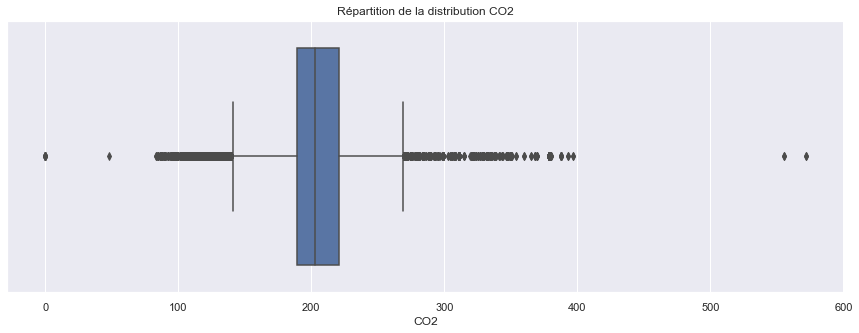

In [30]:
# Répartition de la distribution CO2:
plt.figure(figsize = (15, 5))
sns.boxplot(df_2013['CO2'])
plt.title('Répartition de la distribution CO2');

50% de la distribution est proche de 200 g/km. 
Peu de données pour des valeurs de CO2 inférieures à 189 g/km et supérieures à 221 g/km. 
La distribution est très étendue allant de 0 à 600 g/km

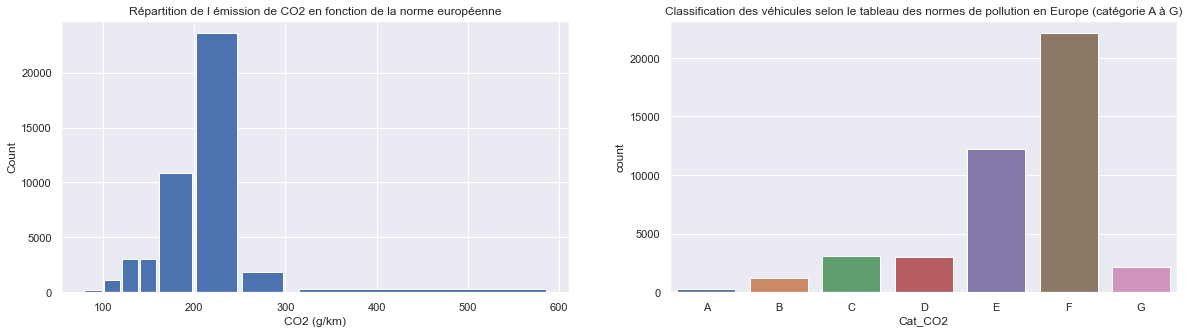

In [31]:
plt.figure(figsize = (20, 5))

# Histogramme représentant la répartition de l'émission de CO2 des véhicules selon la norme européenne:

plt.subplot(121)
plt.hist(df_2013['CO2'], bins = [79,100,120,140,160,200,250,300,600], rwidth = 0.9)
plt.xlabel('CO2 (g/km)')
plt.ylabel('Count')
plt.title('Répartition de l émission de CO2 en fonction de la norme européenne');

# Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G):

plt.subplot(122)
sns.countplot(data = df_2013, x = 'Cat_CO2', order = ('A','B','C','D','E','F','G'))
plt.title('Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G)');



In [32]:
df_2013.Cat_CO2.value_counts()

F    22083
E    12245
C     3106
D     3011
G     2136
B     1208
A      258
Name: Cat_CO2, dtype: int64

### 4.2 *Analyse des variables quantitatives*

#### *Heatmap*

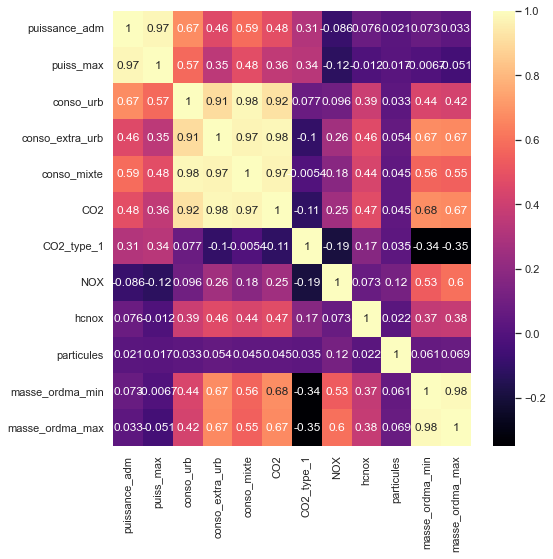

In [33]:
# Corrélation entre les variables : affichage de la heatmap
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(df_2013.corr(), annot = True, ax = ax, cmap = 'magma');

La Heatmap montre que les masses en ordre de marche et la consommation des véhicules sont très corrélées avec les niveaux d'emission en CO2.

On va tenter de visualiser cela.

Par contre, les variables NOX, hcnox et particules sont des émissions au même titre que le CO2. Elles ne seront pas conservées comme variables explicatives. 

#### *Lien entre les masses des véhicules et leurs niveaux d'émission de CO2*

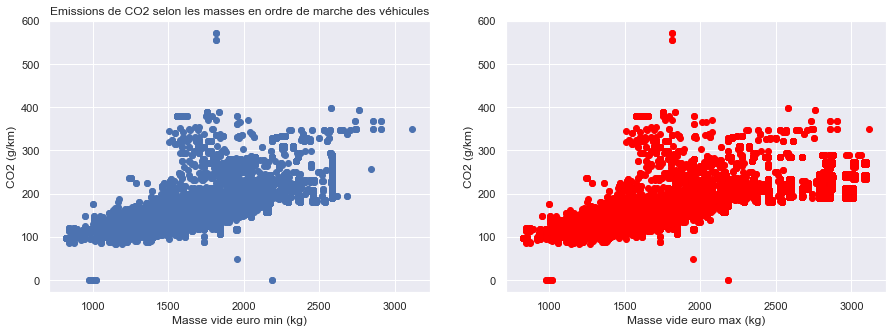

In [34]:
# Graphique montrant le lien entre les masses des véhicules et leurs niveaux d'émission de CO2
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_2013['masse_ordma_min'], df_2013['CO2'])
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro min (kg)')
plt.title('Emissions de CO2 selon les masses en ordre de marche des véhicules')

plt.subplot(1, 2, 2)
plt.scatter(df_2013['masse_ordma_max'], df_2013['CO2'], color= 'red')
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro max (kg)');

Les 2 graphiques sont très similaires. Donc on peut déjà voir qu'il y a une colinéarité entre ces 2 variables.

#### *Lien entre la consommation des véhicules et leurs niveaux d'émission de CO2*

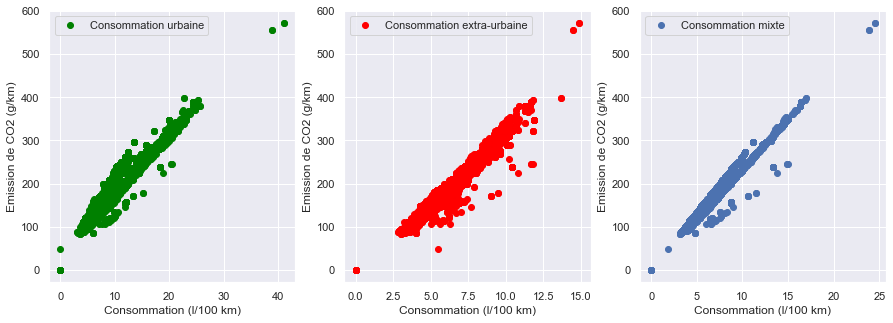

In [35]:
# Relation entre les consommations et les émissions en CO2
plt.figure(figsize = (15, 5))
plt.title('Relation entre les consommations et les émissions en CO2')
plt.subplot(1, 3, 1)
plt.scatter(df_2013['conso_urb'], df_2013['CO2'], label = 'Consommation urbaine', color = 'green')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(df_2013['conso_extra_urb'], df_2013['CO2'], label = 'Consommation extra-urbaine', color = 'red')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df_2013['conso_mixte'], df_2013['CO2'], label = 'Consommation mixte')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend();

Les graphes montrent une corrélation quasi-linéaire entre la consommation des véhicules et leurs niveaux d'émission en CO2. Ceci illustre une colinéarité entre les variables de consommation et les émissions en CO2. La consommation du véhicule est une donnée dépendante et ne sera donc pas retenue comme variable explicative.

### 4.3 *Analyse des variables qualitatives*

#### *Marque et modèles*

In [36]:
# Nombre de marques différentes
print('Il y a', df_2013.Marque.value_counts().size, 'marques différentes')

Il y a 49 marques différentes


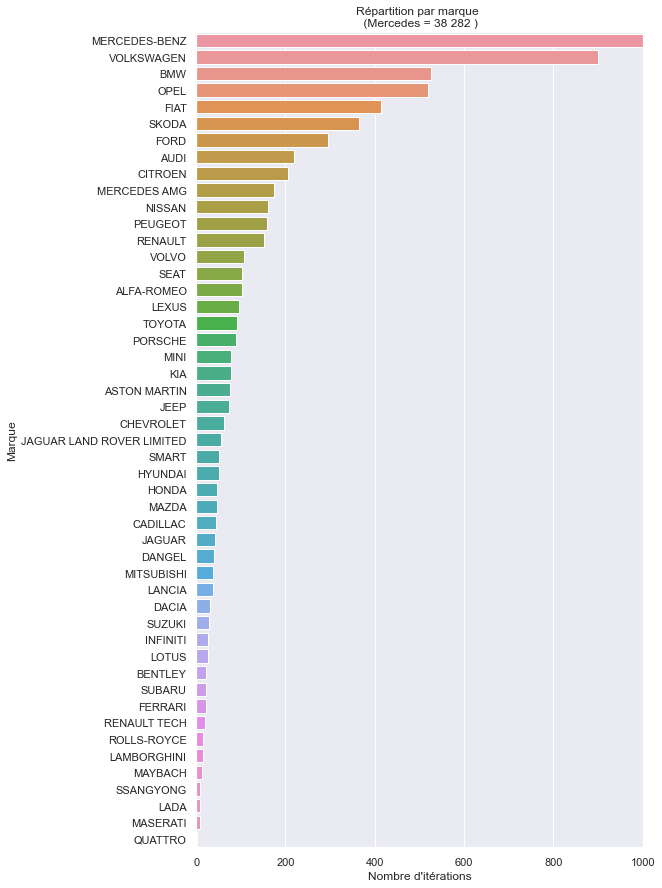

In [37]:
# Répartition des marques
ax = plt.subplots(figsize=(8,15))
plot=sns.countplot(y='Marque',data=df_2013, order = df_2013.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque \n (Mercedes = 38 282 )')
plot.set(xlim=(0, 1000));

Répartition par modèle sur Mercedes pour comprendre la sur-représentation de la marque

In [38]:
# Nombre de modèles différents
df_2013.modele_dossier.value_counts().size

439

In [39]:
def graph_mod(marque_vehicule):
    table=df_2013[df_2013['Marque']==marque_vehicule]
    ax = plt.subplots(figsize=(8,6))
    plot=sns.countplot(y='modele_dossier',data=table,order = table.modele_dossier.value_counts().index)
    plot.set_xlabel("Nombre d'itérations")
    plot.set(title=marque_vehicule);    

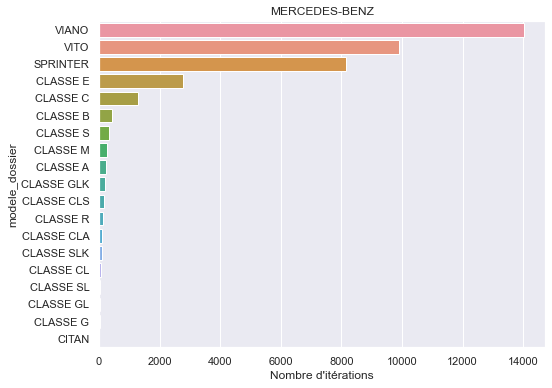

In [40]:
graph_mod('MERCEDES-BENZ')

In [41]:
#ANOVA marques
result = statsmodels.formula.api.ols('CO2 ~ Marque', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table
#il existe un lien significatif entre la variable CO2 et la marque

df        sum_sq        mean_sq           F  PR(>F)
Marque       48.0  1.849635e+07  385340.538182  367.136078     0.0
Residual  43998.0  4.617964e+07    1049.585050         NaN     NaN

In [42]:
#ANOVA modèles
result = statsmodels.formula.api.ols('CO2 ~ modele_dossier', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table
#il existe un lien significatif entre la variable CO2 et le modèle

df        sum_sq        mean_sq           F  PR(>F)
modele_dossier    438.0  4.483993e+07  102374.260819  225.061639     0.0
Residual        43608.0  1.983606e+07     454.872102         NaN     NaN

#### *Hybrides*

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


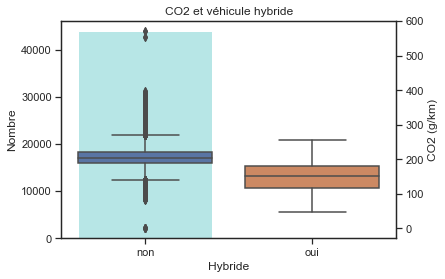

In [43]:
# Répartition des véhiculues hybrides et estimation du lien avec les émissions de CO2
sns.set_style("ticks")


fig, ax = plt.subplots()

sns.countplot(df_2013.Hybride,color='paleturquoise',ax=ax)
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='Hybride',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et véhicule hybride')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [44]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Hybride', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq        mean_sq          F        PR(>F)
Hybride       1.0  4.353654e+05  435365.422092  298.49757  1.162034e-66
Residual  44045.0  6.424062e+07    1458.522498        NaN           NaN

In [45]:
print('Pourcentage de véhicules non-hybride dans le dataset =',
      round(df_2013.Carburant[(df_2013['Hybride']=='non')].count()/df_2013.Hybride.count()*100,2),'%')

Pourcentage de véhicules non-hybride dans le dataset = 99.63 %


Les véhicules non-hybrides représentent 98% de tous les véhicules du dataset. Les véhicules hybrides ne sont pas suffisamment représentés

#### *Gamme de véhicule (supérieure, luxe, inférieure, économique)*

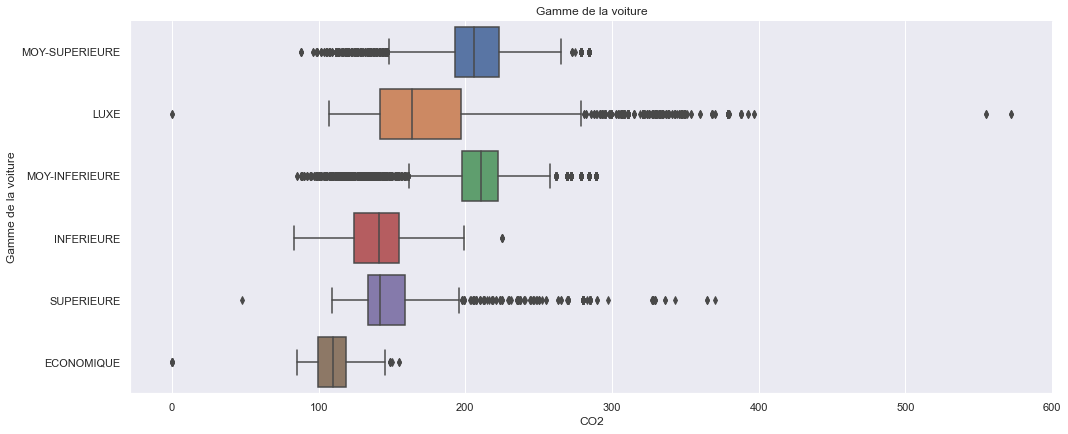

In [46]:
# Répartition des types de gammes de véhicules selon les niveaux d'émission de CO2
plot2=sns.catplot(y='gamme2',x='CO2',kind='box',data=df_2013, height=6, aspect=15/6);
plot2.set(title='Gamme de la voiture')
plot2.set(ylabel='Gamme de la voiture');

In [47]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ gamme2', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq       mean_sq            F  PR(>F)
gamme2        5.0  1.596087e+07  3.192174e+06  2885.891102     0.0
Residual  44041.0  4.871512e+07  1.106131e+03          NaN     NaN

#### *Carburant*

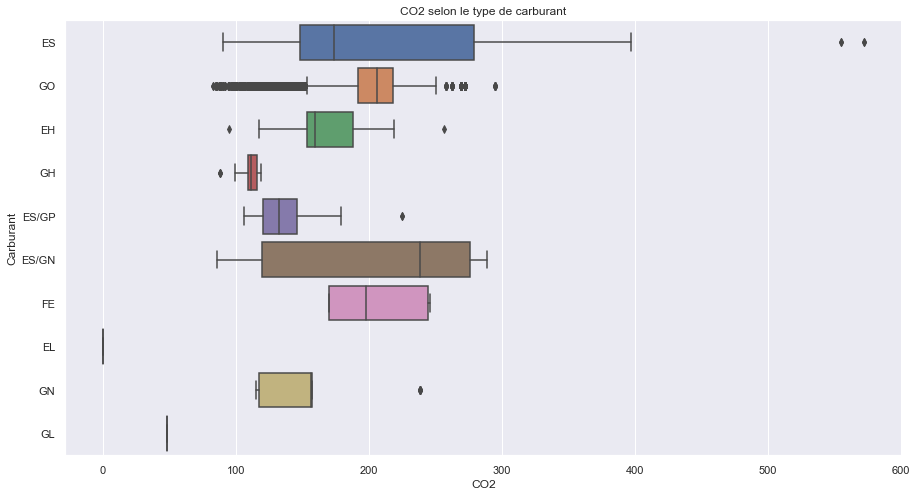

In [48]:
# Répartition entre les types de carburants selon leurs émissions de CO2
plt.figure(figsize = (15,8))
ax = sns.boxplot(y='Carburant',x='CO2',data=df_2013)
ax.set(title='CO2 selon le type de carburant');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [49]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Carburant', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq        mean_sq          F         PR(>F)
Carburant      9.0  1.216506e+06  135167.334935  93.797864  3.323038e-174
Residual   44037.0  6.345948e+07    1441.049182        NaN            NaN

In [50]:
# Pourcentage de véhicules essence et diesel dans le dataset:
print('Pourcentage de véhicules essence et diesel dans le dataset =',
      round(((df_2013.Carburant[(df_2013['Carburant']=='ES')].count()) + (df_2013.Carburant[(df_2013['Carburant']=='GO')].count()))/df_2013.Carburant.count()*100,2),
     '%')

Pourcentage de véhicules essence et diesel dans le dataset = 99.28 %


In [51]:
# Les véhicules ES et GO représentent 99% de tous les véhicules du dataset:
# ==> on ne garde que les carburants ES et GO, les autres carburants n'étant pas suffisamment représentés:
df_2013 = df_2013[(df_2013['Carburant']=='ES') | (df_2013['Carburant']=='GO')]

#### *Carrosserie*

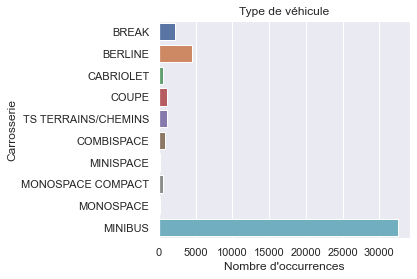

In [52]:
# Répartition des types de carrosserie

plot_car2=sns.countplot(y=df_2013.Carrosserie)
plot_car2.set_xlabel("Nombre d'occurrences")
plot_car2.set_ylabel('Carrosserie')
plot_car2.set(title='Type de véhicule');

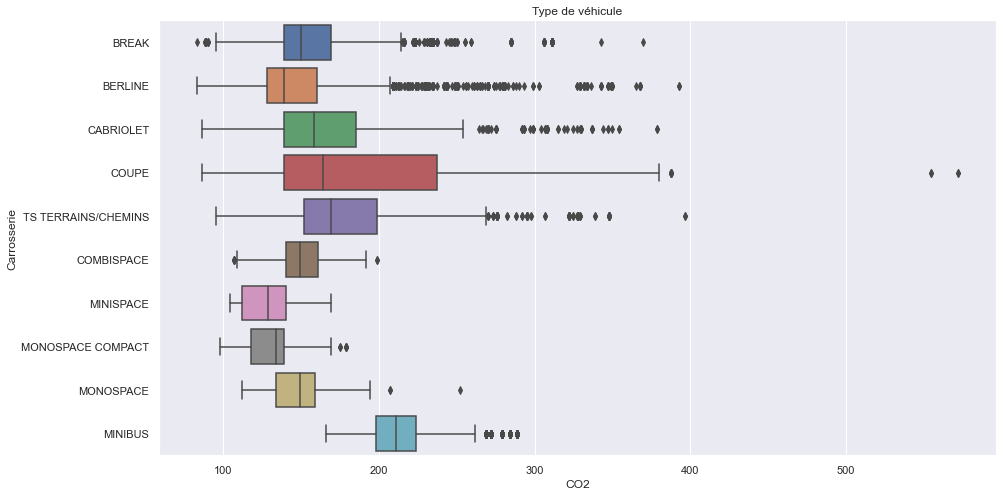

In [53]:
# Lien entre les types de carrosserie et les émissions de CO2
plt.figure(figsize = (15,8))
ax = sns.boxplot(y='Carrosserie',x='CO2',data=df_2013)
ax.set(title='Type de véhicule');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [54]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Carrosserie', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq       mean_sq            F  PR(>F)
Carrosserie      9.0  2.747198e+07  3.052442e+06  3753.257888     0.0
Residual     43718.0  3.555489e+07  8.132781e+02          NaN     NaN

#### *Boîte*

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


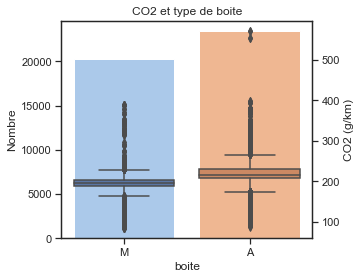

In [55]:
# Répartition des types de boîtes de vitesse selon les émissions de CO2

sns.set_style("ticks")

fig, ax = plt.subplots()

sns.countplot(df_2013.boite,ax=ax,palette='pastel')
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='boite',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et type de boite')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [56]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ boite', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq       mean_sq            F  PR(>F)
boite         1.0  6.987828e+06  6.987828e+06  5452.444556     0.0
Residual  43726.0  5.603904e+07  1.281595e+03          NaN     NaN

#### *Norme EURO*

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


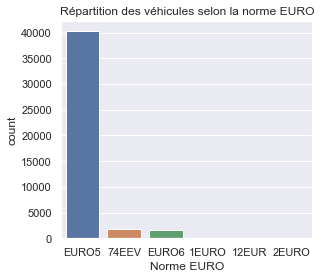

In [57]:
plot_norme=sns.countplot(df_2013['norme_EURO'], order = df_2013['norme_EURO'].value_counts().index)
plot_norme.set_xlabel("Norme EURO")
plot_norme.set(title='Répartition des véhicules selon la norme EURO');
# Il y a une sur-représentation de véhicules avec la norme EURO5

## 5. Sélection des variables utiles

In [58]:
# On ne conserve que les variables qui vont être utiles pour la modélisation
# Les variables corrélées entre-elles sont aussi délaissées

df = df_2013.drop(columns = ['modele_UTAC', 'modele_dossier', 'design_comm', 'CNIT', "TVV", 'puissance_adm', 'Hybride',
                              'boite0', 'conso_urb', 'conso_extra_urb', 'conso_mixte', 'CO2_type_1', 'NOX', 'hcnox', 'norme_EURO',
                              'particules','masse_ordma_max', 'champ_V9', 'date_maj','gamme', 'rapport','cat', 'mq', 'genre'])

In [59]:
# On revérifie les doublons avec cette nouvelle base
# On checke les doublons
print('Il y a', df.duplicated().sum(), 'doublons dans le dataset avant traitement')

# et on les supprime
df = df.drop_duplicates()
print('Maintenant, il y a', df.duplicated().sum(), 'doublons dans le dataset')

Il y a 38708 doublons dans le dataset avant traitement
Maintenant, il y a 0 doublons dans le dataset


In [60]:
print("La taille de la base originale était de ",df_2013.shape,' elle est désormais de ',df.shape)

La taille de la base originale était de  (43728, 33)  elle est désormais de  (5020, 9)


La suppression de certaines variables a généré un nombre très important de doublons, la taille de la base est largement réduite maintenant, mais les données supprimées étaient redondantes

In [61]:
df.head()

Marque Carburant  puiss_max    CO2  masse_ordma_min Carrosserie boite  \
0  ALFA-ROMEO        ES      147.0  182.0             1505       BREAK     M   
1  ALFA-ROMEO        GO      125.0  136.0             1565     BERLINE     M   
2  ALFA-ROMEO        GO      100.0  134.0             1565     BERLINE     M   
4  ALFA-ROMEO        GO      125.0  139.0             1565     BERLINE     M   
6  ALFA-ROMEO        ES      147.0  186.0             1555       BREAK     M   

           gamme2 Cat_CO2  
0  MOY-SUPERIEURE       E  
1  MOY-SUPERIEURE       C  
2  MOY-SUPERIEURE       C  
4  MOY-SUPERIEURE       C  
6  MOY-SUPERIEURE       E

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 44849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Marque           5020 non-null   object  
 1   Carburant        5020 non-null   object  
 2   puiss_max        5020 non-null   float64 
 3   CO2              5020 non-null   float64 
 4   masse_ordma_min  5020 non-null   int64   
 5   Carrosserie      5020 non-null   object  
 6   boite            5020 non-null   object  
 7   gamme2           5020 non-null   object  
 8   Cat_CO2          5020 non-null   category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 358.2+ KB


In [63]:
df.describe()

puiss_max          CO2  masse_ordma_min
count  5020.000000  5020.000000      5020.000000
mean    136.666096   165.814940      1675.667131
std      80.097386    50.539183       358.301644
min      40.000000    83.000000       825.000000
25%      85.000000   132.000000      1440.000000
50%     112.500000   154.000000      1615.000000
75%     150.000000   192.000000      1936.500000
max     559.300000   572.000000      3115.000000

## 6. Revue statistique - Data visualisation 2 (après sélection des variables)

#### *Suppression des outliers*

In [64]:
df = df.drop([115,116], 0)
df.describe()

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_36896/1756782283.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop([115,116], 0)


puiss_max          CO2  masse_ordma_min
count  5018.000000  5018.000000      5018.000000
mean    136.497648   165.656437      1675.611598
std      79.667527    49.921201       358.362253
min      40.000000    83.000000       825.000000
25%      85.000000   132.000000      1440.000000
50%     111.000000   154.000000      1615.000000
75%     150.000000   192.000000      1937.500000
max     541.000000   397.000000      3115.000000

#### *Séparation des variables*

In [65]:
# On sépare les variables numériques et catégorielles
var_num = df.select_dtypes(exclude = 'object') # On récupère les variables numériques
var_cat = df.select_dtypes(include = 'object') # On récupère les variables catégorielles

# On récupère les variables cibles
target_reg = df['CO2']                         # Variable cible pour la regression
target_class = df['Cat_CO2']                   # Variable cible pour la classification

var_num = var_num.drop(['Cat_CO2', 'CO2'], axis = 1)  # Les variables cibles sont éliminées des variables numériques

In [66]:
display(var_cat.head())
display(var_num.head())

Marque Carburant Carrosserie boite          gamme2
0  ALFA-ROMEO        ES       BREAK     M  MOY-SUPERIEURE
1  ALFA-ROMEO        GO     BERLINE     M  MOY-SUPERIEURE
2  ALFA-ROMEO        GO     BERLINE     M  MOY-SUPERIEURE
4  ALFA-ROMEO        GO     BERLINE     M  MOY-SUPERIEURE
6  ALFA-ROMEO        ES       BREAK     M  MOY-SUPERIEURE

puiss_max  masse_ordma_min
0      147.0             1505
1      125.0             1565
2      100.0             1565
4      125.0             1565
6      147.0             1555

In [67]:
print('Les variables catégorielles :\n')
display(var_cat.head())

print('Les variables numériques :\n')
display(var_num.head())

Les variables catégorielles :



Marque Carburant Carrosserie boite          gamme2
0  ALFA-ROMEO        ES       BREAK     M  MOY-SUPERIEURE
1  ALFA-ROMEO        GO     BERLINE     M  MOY-SUPERIEURE
2  ALFA-ROMEO        GO     BERLINE     M  MOY-SUPERIEURE
4  ALFA-ROMEO        GO     BERLINE     M  MOY-SUPERIEURE
6  ALFA-ROMEO        ES       BREAK     M  MOY-SUPERIEURE

Les variables numériques :



puiss_max  masse_ordma_min
0      147.0             1505
1      125.0             1565
2      100.0             1565
4      125.0             1565
6      147.0             1555

### *6.1 Représentation graphique de l'indicateur CO2*

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


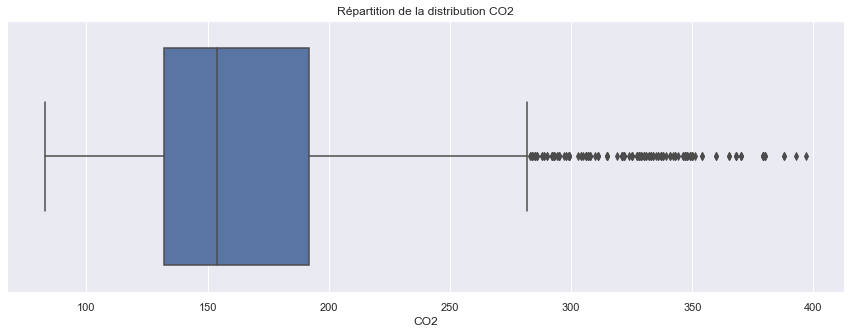

In [68]:
# Répartition de la distribution CO2:
plt.figure(figsize = (15, 5))
sns.boxplot(df['CO2'])
plt.title('Répartition de la distribution CO2');

La variable CO2 fortement impactée par le choix des variables et le dédoublonnage, le CO2 médian a diminué de 50 g/ km

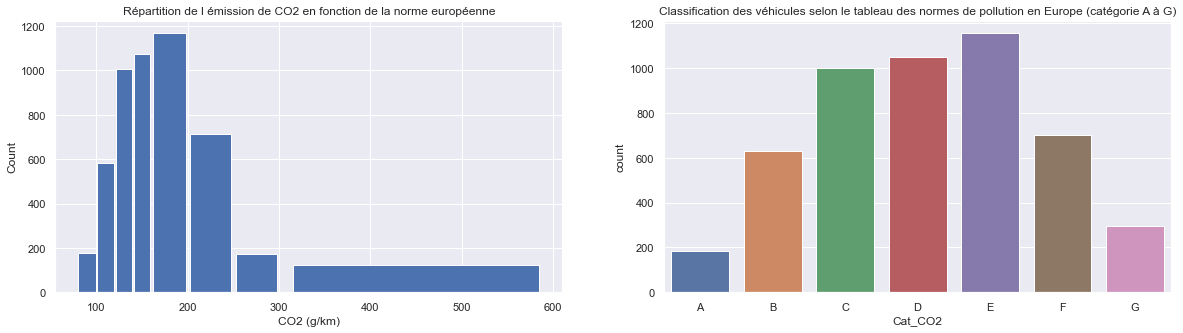

In [69]:
plt.figure(figsize = (20, 5))

# Histogramme représentant la répartition de l'émission de CO2 des véhicules selon la norme européenne:

plt.subplot(121)
plt.hist(df['CO2'], bins = [79,100,120,140,160,200,250,300,600], rwidth = 0.9)
plt.xlabel('CO2 (g/km)')
plt.ylabel('Count')
plt.title('Répartition de l émission de CO2 en fonction de la norme européenne');

# Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G):

plt.subplot(122)
sns.countplot(data = df, x = 'Cat_CO2', order = ('A','B','C','D','E','F','G'))
plt.title('Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G)');



On constate une répartition plus homogène selon les catégories de CO2

### 6.2 *Analyse des variables quantitatives*

#### *Heatmap*

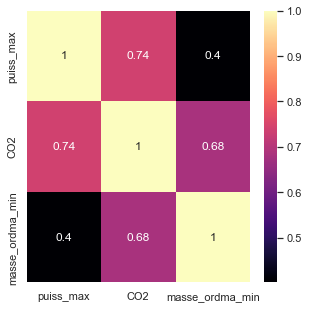

In [70]:
# Corrélation entre les variables : affichage de la heatmap
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(df.corr(), annot = True, ax = ax, cmap = 'magma');

### 6.3 *Analyse des variables qualitatives*

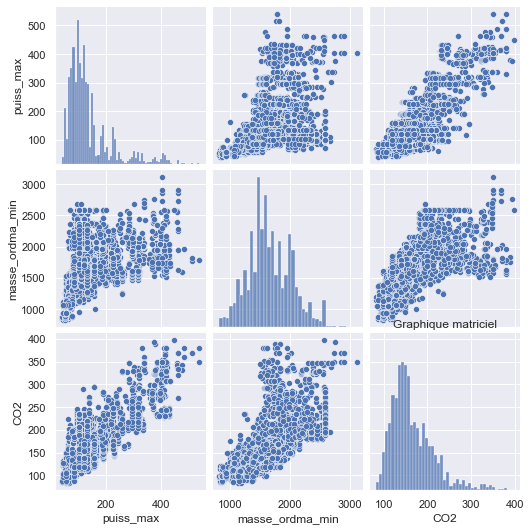

In [71]:
var2 = var_num.join(target_reg)

sns.pairplot(data = var2,
             x_vars = var2.columns,
             y_vars = var2.columns)
plt.title('Graphique matriciel');

### 6.3 *Analyse des variables qualitatives*

#### *Marque*

In [72]:
# Nombre de marques différentes
print('Il y a', df.Marque.value_counts().size, 'marques différentes')

Il y a 49 marques différentes


Aucune marque n'a disparu : nous avons seulement supprimé les doublons

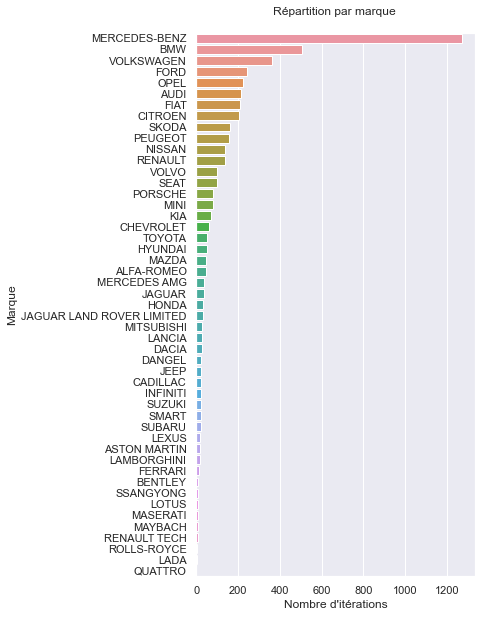

In [73]:
# Répartition des marques
ax = plt.subplots(figsize=(5,10))
plot=sns.countplot(y='Marque',data=df, order = df.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque \n');

On refait les ANOVA pour vérifier les liens avec la variable CO2 :

In [74]:
#ANOVA marques
result = statsmodels.formula.api.ols('CO2 ~ Marque', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq        mean_sq          F  PR(>F)
Marque      48.0  5.247198e+06  109316.623333  74.863463     0.0
Residual  4969.0  7.255800e+06    1460.213278        NaN     NaN

In [75]:
#carburant
result = statsmodels.formula.api.ols('CO2 ~ Carburant', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq        mean_sq           F        PR(>F)
Carburant     1.0  7.331370e+05  733136.972890  312.443379  7.067478e-68
Residual   5016.0  1.176986e+07    2346.463462         NaN           NaN

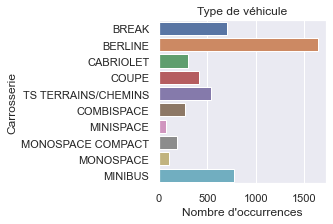

In [76]:
# Répartition des types de carrosserie

plt.subplots(figsize=(3,3))

plot_car2=sns.countplot(y=df.Carrosserie)
plot_car2.set_xlabel("Nombre d'occurrences")
plot_car2.set_ylabel('Carrosserie')
plot_car2.set(title='Type de véhicule');

La répartition des types de véhicules est plus homogène

In [77]:
#Carrosserie
result = statsmodels.formula.api.ols('CO2 ~ Carrosserie', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq        mean_sq           F         PR(>F)
Carrosserie     9.0  3.060552e+06  340061.278261  180.358654  2.408599e-297
Residual     5008.0  9.442446e+06    1885.472483         NaN            NaN

In [78]:
#gamme2
result = statsmodels.formula.api.ols('CO2 ~ gamme2', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq        mean_sq           F         PR(>F)
gamme2       5.0  2.506897e+06  501379.423030  251.389394  2.440303e-240
Residual  5012.0  9.996101e+06    1994.433476         NaN            NaN

Les liens entre la variable CO2 et les variables qualitatives sont tous significatifs

***

# **2e partie : Modélisation**

***

### *Import des librairies utiles*

In [79]:
# Les différents types de modèles de Machine Learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

# Les fonctions de paramétrage de la modélisation
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import GridSearchCV

# Les fonctions de preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Les fonctions statistiques
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Les métriques
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

# Les fonctions de sauvegarde et chargement de modèles
from joblib import dump, load

from sklearn.model_selection import train_test_split

## 1. Regression

### ***Déterminer les émissions de CO2 d'un véhicule mis sur le marché***

#### *Revue de variables d'intérêt*

In [80]:
# Labélisation des variables catégorielles par labelencoder:
labelencoder = LabelEncoder()
var_cat_num = var_cat.apply(labelencoder.fit_transform)

In [81]:
# Jointure var_num avec var_cat_num en un dataframe data:
data = var_num.join(var_cat_num)

display(data.head())
display(data.info())
display(data.describe())

puiss_max  masse_ordma_min  Marque  Carburant  Carrosserie  boite  gamme2
0      147.0             1505       0          0            1      1       4
1      125.0             1565       0          1            0      1       4
2      100.0             1565       0          1            0      1       4
4      125.0             1565       0          1            0      1       4
6      147.0             1555       0          0            1      1       4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5018 entries, 0 to 44849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   puiss_max        5018 non-null   float64
 1   masse_ordma_min  5018 non-null   int64  
 2   Marque           5018 non-null   int32  
 3   Carburant        5018 non-null   int32  
 4   Carrosserie      5018 non-null   int32  
 5   boite            5018 non-null   int32  
 6   gamme2           5018 non-null   int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 344.7 KB


None

puiss_max  masse_ordma_min       Marque    Carburant  Carrosserie  \
count  5018.000000      5018.000000  5018.000000  5018.000000  5018.000000   
mean    136.497648      1675.611598    24.473296     0.590076     3.029095   
std      79.667527       358.362253    14.292782     0.491868     3.087384   
min      40.000000       825.000000     0.000000     0.000000     0.000000   
25%      85.000000      1440.000000    11.000000     0.000000     0.000000   
50%     111.000000      1615.000000    29.000000     1.000000     2.000000   
75%     150.000000      1937.500000    33.000000     1.000000     5.000000   
max     541.000000      3115.000000    48.000000     1.000000     9.000000   

             boite       gamme2  
count  5018.000000  5018.000000  
mean      0.538063     2.793145  
std       0.498599     1.292354  
min       0.000000     0.000000  
25%       0.000000     2.000000  
50%       1.000000     3.000000  
75%       1.000000     4.000000  
max       1.000000     5.000000

### **1.1. Premier modèle**

#### 1.1.1. Préparation du dataset  - Séparation en un jeu d'entrainement et de test - standardisation des variables numériques d'entrainement

In [82]:
# Séparation du jeu de données en un jeu d'entrainement et de test:
X_train, X_test, y_train, y_test = train_test_split(data, target_reg, test_size = 0.2)

#Standardisation des valeurs numériques + variables 'Marque' (beaucoup de catégories (>10)):
cols = ['puiss_max', 'masse_ordma_min', 'Marque']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

display(X_train.head())
display(X_train.describe())

C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


puiss_max  masse_ordma_min    Marque  Carburant  Carrosserie  boite  \
2994    0.689220        -0.583105  0.170452          0            0      1   
10304  -0.204204         0.970860  0.311030          1            5      0   
43010  -0.072078        -0.230057  0.873342          1            4      1   
890     3.319159         1.390625 -1.446196          0            0      0   
2506    0.047465         0.153569 -0.532438          1            9      1   

       gamme2  
2994        3  
10304       3  
43010       4  
890         2  
2506        2

puiss_max  masse_ordma_min        Marque    Carburant  Carrosserie  \
count  4.014000e+03     4.014000e+03  4.014000e+03  4014.000000  4014.000000   
mean  -2.207170e-17     1.759098e-17  1.106351e-18     0.597409     3.069258   
std    1.000125e+00     1.000125e+00  1.000125e+00     0.490481     3.099671   
min   -1.210879e+00    -2.376141e+00 -1.727352e+00     0.000000     0.000000   
25%   -6.446241e-01    -6.387028e-01 -9.541725e-01     0.000000     0.000000   
50%   -3.300382e-01    -1.522200e-01  3.110298e-01     1.000000     2.000000   
75%    1.732994e-01     7.373485e-01  5.921858e-01     1.000000     5.000000   
max    5.093424e+00     3.406054e+00  1.646521e+00     1.000000     9.000000   

             boite       gamme2  
count  4014.000000  4014.000000  
mean      0.533881     2.786248  
std       0.498913     1.292563  
min       0.000000     0.000000  
25%       0.000000     2.000000  
50%       1.000000     3.000000  
75%       1.000000     4.000000  
max       1.000000     5.000000

#### 1.1.2. Création du modèle de régression, entraînement et évaluation du modèle

R2 modèle_train = 0.78
R2 obtenu par CV = 0.78
R2 modèle_test = 0.78

RMSE_train = 23.38
RMSE_test = 23.13

MAE_train: 18.08
MAE_test: 17.67

Erreur relative = 11.0 %

Intercept = 176.31


coefficient   VIF
masse_ordma_min    27.731555  1.60
Carburant         -26.582479  3.26
puiss_max          22.281171  1.62
boite               3.093885  2.40
Marque              2.479844  1.04
Carrosserie         1.967503  2.11
gamme2             -0.840867  3.38

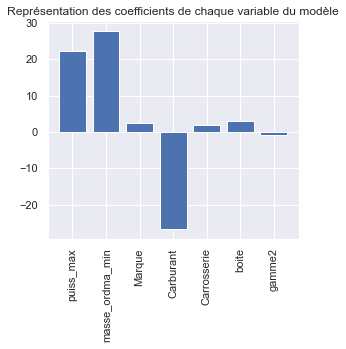

In [83]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Entraînement et prédictions:
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train) # = valeurs ajustées X_train
pred_test = lr.predict(X_test) # = valeurs ajustées X_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(X_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,X_train,y_train, cv = 5).mean(),2))
print("R2 modèle_test =", round(lr.score(X_test, y_test),2))
print('\nRMSE_train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
print('RMSE_test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),2))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(X_train.columns, coef)
plt.xticks(X_train.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle');

# Affichage de l'intercept:
print('\nIntercept =', round(lr.intercept_,2))

# Tableau des coefficients et des VIF (Multicolinéarité) par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(X_train.columns))

# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)

In [84]:
#Analyse statsmodel
X = X_train
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

C:\Users\Christophe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2049.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:46:43   Log-Likelihood:                -18347.
No. Observations:                4014   AIC:                         3.671e+04
Df Residuals:                    4006   BIC:                         3.676e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             176.3149      1.185    1

#### 1.1.3. Interprétation

Les scores obtenus sur l'échantillon d'apprentissage, par validation croisée et sur l'échantillon de test sont corrects et ne montrent pas de sur-apprentissage.

L'erreur moyenne est d'environ 11% des rejets de CO2 moyen.

Les prédictions ne sont pas optimales mais il est possible d'affiner le modèle. La variable carburant est statistiquement significative. Cette variable a beaucoup de poids dans le modèles. On observe une différence significative entre les véhicules essence et diesel.

### **1.2. Modèle affiné - Sélection de variables:**

#### 1.2.1. Création du modèle de régression et d'un sélecteur,  entraînement et évaluation du modèle

In [85]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Création d'un sélecteur à partir de lr:
sfm = SelectFromModel(lr)

# Entrainement du selecteur et sauvegarde des colonnes de X_train sélectionnées par sfm dans sfm_train:
sfm_train = pd.DataFrame(sfm.fit_transform(X_train, y_train), index = X_train.index)
sfm_train = X_train[X_train.columns[sfm.get_support()]]

# Sauvegarde des colonnes de X_test dans sfm_test:
sfm_test = sfm.transform(X_test)
sfm_test = X_test[X_test.columns[sfm.get_support()]]

# Affichage des variables sélectionnées:
X_train.columns[sfm.get_support()]

Index(['puiss_max', 'masse_ordma_min', 'Carburant'], dtype='object')

R2 modèle_train = 0.76
R2 obtenu par CV = 0.76
R2 modèle_test = 0.76

RMSE train = 24.2632
RMSE test = 24.1383

MAE_train: 18.67
MAE_test: 18.27

Erreur relative = 11.0 %


coefficient   VIF
masse_ordma_min    29.805462  1.32
Carburant         -26.481147  1.17
puiss_max          20.006695  1.35

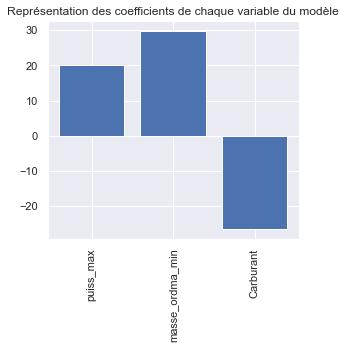

In [86]:
# Régression linéaire:
lr = LinearRegression()
lr.fit(sfm_train, y_train)
pred_train = lr.predict(sfm_train) # = valeurs ajustées sfm_train
pred_test = lr.predict(sfm_test) # = valeurs ajustées sfm_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(sfm_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,sfm_train,y_train).mean(),2))
print("R2 modèle_test =", round(lr.score(sfm_test, y_test),2))
print('\nRMSE train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),4))
print('RMSE test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),4))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(sfm_train.columns, coef)
plt.xticks(sfm_train.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle')
;

# Tableau des coefficients et des VIF (Multicolinéarité)par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(sfm_train.columns))

# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(sfm_train.values, i),2) for i in range(sfm_train.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)


C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


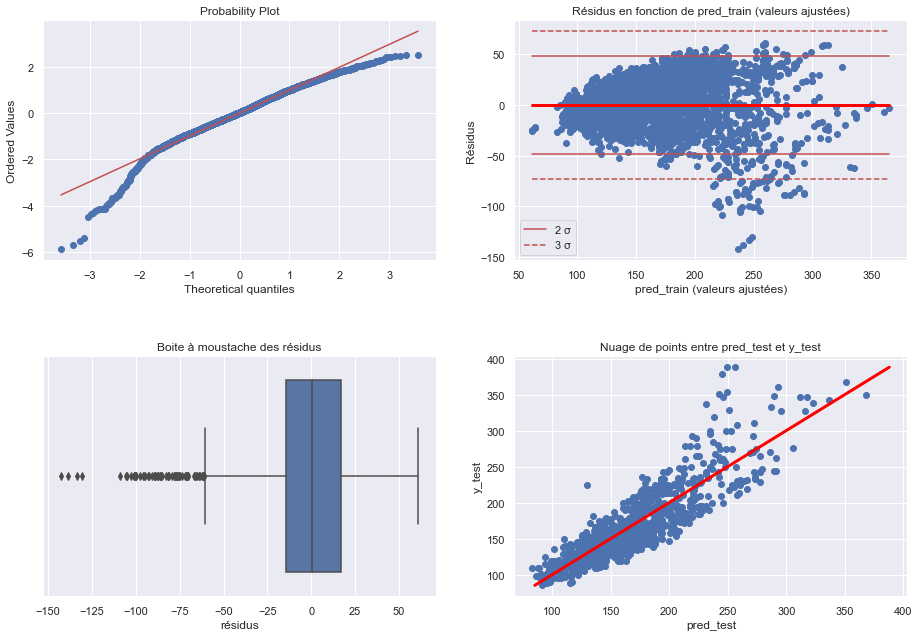

In [87]:
#Normalité des résidus:
## Calcul des résidus et résidus normalisés:
residus = pred_train - y_train 
residus_norm = (residus-residus.mean())/residus.std()
residus_std = residus/np.sqrt(sum(residus**2)/(len(residus)-1)) #utilisation des résidus standards pour test Jarque-Bera

# Graphes :
plt.figure(figsize = (15,10))
# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

## Graphe normalisation résidus:
plt.subplot(2,2,1)
stats.probplot(residus_norm, plot = plt)

## Graphe résidus en fonction de pred_train (valeurs ajustées):
plt.subplot(2,2,2)
plt.scatter(pred_train, residus)
plt.plot((pred_train.min(), pred_train.max()), (0, 0), lw=3, color='red')
plt.plot((pred_train.min(), pred_train.max()), (2*residus.std(), 2*residus.std()), 'r-', lw=1.5, label = '2 σ') 
plt.plot((pred_train.min(), pred_train.max()), (3*residus.std(), 3*residus.std()), 'r--', lw=1.5, label = '3 σ')
plt.plot((pred_train.min(), pred_train.max()), (-2*residus.std(), -2*residus.std()), 'r-',lw=1.5)
plt.plot((pred_train.min(), pred_train.max()), (-3*residus.std(), -3*residus.std()), 'r--', lw=1.5)
plt.title('Résidus en fonction de pred_train (valeurs ajustées)')
plt.xlabel('pred_train (valeurs ajustées)')
plt.ylabel('Résidus')
plt.legend()

## Graphe boxplot des résidus:
plt.subplot(2,2,3)
sns.boxplot(residus)
plt.title('Boite à moustache des résidus')
plt.xlabel('résidus')

## Graphe prédictions en fonction de y_test (= le long de la droite si elles sont bonnes):
plt.subplot(2,2,4)
plt.scatter(pred_test, y_test)
plt.title('Nuage de points entre pred_test et y_test')
plt.xlabel('pred_test')
plt.ylabel('y_test')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw = 3, color ='red');

3 variables sur 7 ont été sélectionnées:
   - puissance maximale
   - masse minimum
   - carburant (variable négative = les véhicules diesel rejettent moins de CO2 que les véhicules essence).

**METRICS**

Les résultats sont presque identiques au premier modèle. On ne remarque que très peu de perte d'informations (les R2 sont bons et proches) alors que ce dernier modèle possède 2 fois moins de variables explicatives. 


Le modèle parvient à apprendre sur les données d'entraînement et à généraliser sur les données de test avec une erreur de 11% en moyenne

**ANALYSE RESIDUS**

Graphe 1&2:
Les résidus ne suivent pas une loi normale. On remarque beaucoup de points extrêmes.
La présence de groupes pourrait en partie expliquer ce phénomène (1 groupe de véhicules diesel et 1 autre de véhicules essence).

Graphe 4:
On observe une relation avec un leger aspect d'"entonnoir asymétrique":
   - plus y_pred augmente, plus les résidus s'éloignent de y_pred (la dispersion augmente avec y_pred),
   - à partir d'une prévision d'environ 210 g/km de CO2, la dispersion est beaucoup plus importante surtout d'un côté:  les rejets réels des véhicules sont beaucoup plus importants que prévu.
   
Trop de points aberrants et éloignés. 
On note que 2 véhicules rejettent nettement plus de CO2 que les autres.


#### 1.2.2. Représentation graphique et conclusion

<IPython.core.display.Javascript object>


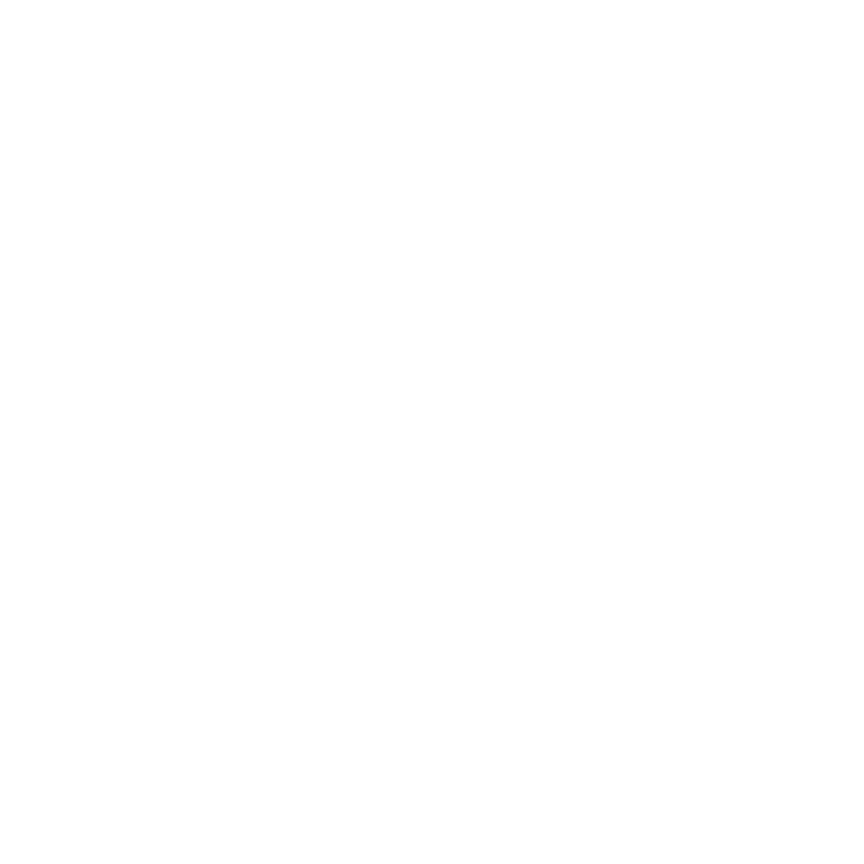

In [88]:
# Représentation graphique en 4D de l'influence de ces 3 variables significatives
#sur la variable explicative target (= rejet CO2):
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

z = y_train
x = sfm_train['puiss_max']
y = sfm_train['masse_ordma_min']

ax.scatter(x, y, z,  c=sfm_train['Carburant'], cmap = ('viridis'))
ax.set_xlabel('Puissance véhicules (valeurs standardisées)')
ax.set_ylabel('Masse véhicules (valeurs standardisées)')
ax.set_zlabel('CO2 (g/km)')

plt.legend(['ES','GO'])
plt.title('Représentation des rejets de CO2 des  véhicules en fonction de leurs masses, leurs poids et leurs carburants')
plt.show()

La variable carburant est statistiquement significative, c'est-à-dire qu'on observe une différence significative entre les véhicules essence et diesel. Ceci semble cohérent. L'essence et le diesel ont des propriétés différentes et les moteurs associés ont des technologies différentes.

Le graphe précédent nous montre bien l'impact de la variable carburant sur les rejets de CO2. Il semble que les rejets de CO2 sont plus dépendants de la masse du véhicule pour les véhicules diesel et de la puissance maximale pour les véhicules essence.

Il pourrait donc être judicieux de créer 2 modèles différents: un essence et un diesel pour le confirmer.

### 1.3. Impact des catégories essence (ES) et diesel (GO) sur les rejets de CO2 (= target)

<IPython.core.display.Javascript object>


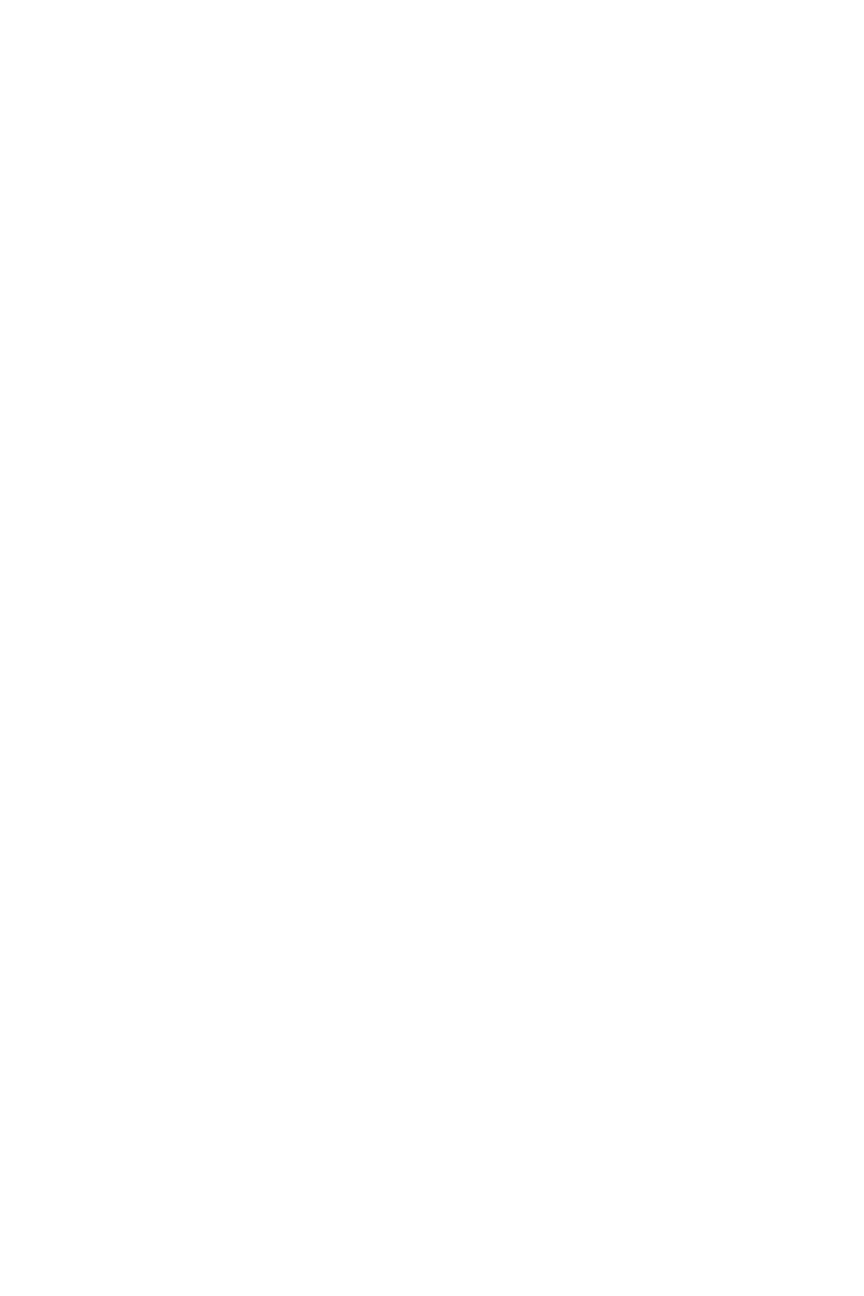

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KstestResult(statistic=1.0, pvalue=0.0)


CO2       CO2 ES       CO2 GO
count  5018.000000  2057.000000  2961.000000
mean    165.656437   180.158483   155.581898
std      49.921201    61.017245    37.286140
min      83.000000    90.000000    83.000000
25%     132.000000   139.000000   127.000000
50%     154.000000   160.000000   149.000000
75%     192.000000   209.000000   186.000000
max     397.000000   397.000000   295.000000

In [89]:
from scipy.stats import norm
from scipy.stats import kstest
 

plt.figure(figsize =(10,15))

# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.6) 

plt.subplot(511)

# Analyse de la distribution target (CO2 (g/km)):
dist = pd.DataFrame(target_reg)

# Histogramme de distribution:
plt.hist(dist, bins=60, density=True, alpha=0.6, color='b')
plt.title('Histogramme de CO2 (g/km)')
plt.xlim(0,600)
plt.xlabel('CO2 (g/km)')
 
# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution -
# Affichage de la moyenne et la médiane de la distribution:

x_axis = np.arange(0,600,1)
plt.plot(x_axis, norm.pdf(x_axis, dist.mean(), dist.std()),'r', linewidth = 3)
plt.xlim(0,600)
plt.plot((dist.mean(), dist.mean()), (0, 0.015), 'r-', lw=1.5, label = 'moyenne de la distribution')
plt.plot((dist.median(), dist.median()), (0, 0.015), 'r--', lw=1.5, label = 'médiane de la distribution')
plt.legend() 

# Boite à moustache de la distribution:
plt.subplot(512)
sns.boxplot(dist.CO2, notch=True)
plt.title('Boite à moustache de CO2 (g/km)')
plt.xlabel('CO2 (g/km)')
plt.xlim(0,600)
 
# Histogrammes de distribution des véhicules essence et des véhicules diesel :
plt.subplot(513)
ES = df.CO2[df['Carburant']=='ES']
GO = df.CO2[df['Carburant']=='GO']
 
plt.hist(ES,
         bins=80,
         density=True,
         alpha=0.4,
         color='green',
         label ='Distribution des véhicules essence')

plt.hist(GO,
         bins=40,
         density=True,
         alpha=0.4,
         color='orange',
         label ='Distribution des véhicules diesel')

plt.title('Histogramme de CO2 (g/km) en fonction du carburant')
plt.xlabel('CO2 (g/km)')
plt.legend()

# Réprésentation des distributions des véhicules essence et diesel en prenant en compte uniquement
# leurs moyennes et leurs écarts-types (= aspect d'une loi normale avec ces moyennes et ces écarts-types):
## Représentation de la loi normale avec la moyenne et l'écart-type de la distribution des véhicules essence ES:

plt.subplot(514)
x_axis = np.arange(0,600,1)
plt.plot(x_axis,
         norm.pdf(x_axis, ES.mean(), ES.std()),
         'g',
         linewidth = 3,
         alpha = 0.8,
         label ='loi normale [ES)]')

plt.xlim(0,600)
plt.plot((ES.mean(), ES.mean()), (0, 0.015), 'g', lw=1.5, label = 'moyenne de la distribution ES')
plt.plot((ES.median(), ES.median()), (0, 0.015), 'g--', lw=1.5, label = 'médiane de la distribution ES')

## Représentation de la loi normale avec la moyenne et l'écart-type de la distribution des véhicules diesel GO:
plt.plot(x_axis,
         norm.pdf(x_axis, GO.mean(), GO.std()),
         'orange',
         linewidth = 3,
         alpha = 0.8,
         label ='loi normale [GO]')

plt.xlim(0,600)
plt.plot((GO.mean(), GO.mean()), (0, 0.015), 'y', lw=1.5, label = 'moyenne de la distribution GO')
plt.plot((GO.median(), GO.median()), (0, 0.015), 'y--', lw=1.5, label = 'médiane de la distribution GO')

plt.title('Représentation des lois normales des distributions des véhicules essence et diesel suivant leurs moyennes et écarts-types')
plt.xlabel('CO2 (g/km)')
plt.legend()

# Boite à moustache de la distribution en fonction du carburant:
plt.subplot(515)

sns.boxplot(data = df, y = 'Carburant' , x = 'CO2', notch=True)
plt.xticks(rotation = 'vertical')
plt.title('Boite à moustache de CO2 (g/km) en fonction du type de carburant')
plt.xlabel('CO2 (g/km)')
plt.xlim(0,600)
plt.show();

# Test de normalité de la distribution (Kolomgorov-Smirnov):
print(stats.kstest(dist,'norm'))
describe = pd.DataFrame(dist.describe())
describe['CO2 ES'] = df.CO2[df['Carburant']=='ES'].describe()
describe['CO2 GO'] = df.CO2[df['Carburant']=='GO'].describe()
describe

**ANALYSE TARGET CO2**

La distribution CO2 (target) n'est pas normale. Graphiquement, on remarque une légère asymétrie (moyenne et médiane sont décalées) voire un aspect bimodale. 

**ANALYSE VEHICULES ESSENCE ET DIESEL**

Les distributions essence et diesel sont décalées.

La distribution des véhicules essence est plus étalée que celle des véhicules diesel. Les véhicules essence concentrent la majorité des points extrêmes. 

On note un aspect de distribution plus asymétrique pour les véhicules essence et un aspect bimodal pour les véhicules diesel.

La valeur maximale est 2.7 fois supérieure à la valeur du 3ème quantile, ce qui tirent la moyenne vers le haut. Ce phénomène est moins marqué pour les véhicules diesel.

Les véhicules diesel semblent rejeter moins de CO2 que les véhicules essence. 

#### **1.3.1. Analyse véhicules Diesel uniquement**

##### 1.3.1.1. Création du dataset regroupant tous les véhicules diesel

In [90]:
# Création du Dataset des véhicules diesel uniquement dataGO:
dataGO = data.join(target_reg)
dataGO = dataGO[(dataGO['Carburant']==1)]

# Suppression de la variable 'Carburant':
dataGO = dataGO.drop('Carburant', axis = 1)

dataGO.describe()

puiss_max  masse_ordma_min       Marque  Carrosserie        boite  \
count  2961.000000      2961.000000  2961.000000  2961.000000  2961.000000   
mean    111.753597      1761.117866    25.550827     3.557582     0.587977   
std      36.501168       338.624504    14.034376     3.130195     0.492282   
min      40.000000       845.000000     0.000000     0.000000     0.000000   
25%      84.000000      1505.000000    12.000000     0.000000     0.000000   
50%     103.000000      1700.000000    29.000000     3.000000     1.000000   
75%     125.000000      2015.000000    34.000000     5.000000     1.000000   
max     281.000000      2680.000000    48.000000     9.000000     1.000000   

            gamme2          CO2  
count  2961.000000  2961.000000  
mean      2.982101   155.581898  
std       1.199669    37.286140  
min       0.000000    83.000000  
25%       2.000000   127.000000  
50%       3.000000   149.000000  
75%       4.000000   186.000000  
max       5.000000   295.000000

##### 1.3.1.2 Préparation du dataset  - séparation en un jeu d'entrainement et de test - standardisation des variables numériques d'entrainement

In [91]:
# Séparation de la cible du jeu de données:
targetGO = dataGO.CO2
dataGO1 = dataGO.drop('CO2', axis = 1)

In [92]:
# Séparation du jeu de données en un jeu d'entrainement et de test:
X_train, X_test, y_train, y_test = train_test_split(dataGO1, targetGO, test_size = 0.2)

#Standardisation des valeurs numériques + variables 'Marque' (beaucoup de catégories (>10)):
cols = ['puiss_max', 'masse_ordma_min', 'Marque']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

display(X_train.head())
display(X_train.describe())

C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


puiss_max  masse_ordma_min    Marque  Carrosserie  boite  gamme2
9841    0.218988         1.280100  0.253560            5      0       3
7098    1.041580         0.246082  0.253560            0      0       2
44781  -0.055209        -0.838740  1.598072            1      1       4
7336    1.041580         0.544931  0.253560            1      0       2
43150  -0.740702         0.195278  1.031962            7      1       5

puiss_max  masse_ordma_min        Marque  Carrosserie        boite  \
count  2.368000e+03     2.368000e+03  2.368000e+03  2368.000000  2368.000000   
mean   1.959769e-17     1.786296e-17 -7.595276e-18     3.532095     0.582348   
std    1.000211e+00     1.000211e+00  1.000211e+00     3.119339     0.493276   
min   -1.974590e+00    -2.727467e+00 -1.798589e+00     0.000000     0.000000   
25%   -7.407021e-01    -7.550623e-01 -9.494239e-01     0.000000     0.000000   
50%   -2.471470e-01    -1.872489e-01  2.535602e-01     3.000000     1.000000   
75%    3.560871e-01     7.444133e-01  6.073791e-01     5.000000     1.000000   
max    4.633565e+00     2.756415e+00  1.598072e+00     9.000000     1.000000   

            gamme2  
count  2368.000000  
mean      2.996199  
std       1.197266  
min       0.000000  
25%       2.000000  
50%       3.000000  
75%       4.000000  
max       5.000000

In [93]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Entraînement et prédictions:
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train) # = valeurs ajustées X_train
pred_test = lr.predict(X_test) # = valeurs ajustées X_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(X_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,X_train,y_train, cv = 5).mean(),2))
print("R2 modèle_test =", round(lr.score(X_test, y_test),2))
print('\nRMSE_train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
print('RMSE_test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),2))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(X_train.columns, coef)
plt.xticks(X_train.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle');

# Affichage de l'intercept:
print('\nIntercept =', round(lr.intercept_,2))

# Tableau des coefficients et des VIF (Multicolinéarité) par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(X_train.columns))

# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)

R2 modèle_train = 0.8
R2 obtenu par CV = 0.79
R2 modèle_test = 0.82

RMSE_train = 16.84
RMSE_test = 15.77

MAE_train: 13.58
MAE_test: 12.86

Erreur relative = 8.0 %

Intercept = 156.91


coefficient   VIF
masse_ordma_min    31.576652  1.32
boite              -7.511969  2.56
Marque              2.391259  1.06
puiss_max          -1.908018  1.48
Carrosserie         1.239668  2.32
gamme2             -0.458004  3.03

In [94]:
#Analyse statsmodel:
X = X_train
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1541.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:46:44   Log-Likelihood:                -10046.
No. Observations:                2368   AIC:                         2.011e+04
Df Residuals:                    2361   BIC:                         2.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             156.9109      1.131    1

C:\Users\Christophe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Les scores du modèle Diesel sont meilleurs que les scores des modèles précedents (regroupant tous les véhicules). Pas de surajustement.

Les MAE sont plus faibles.

Le modèle parvient à apprendre sur les données d'entraînement et à généraliser sur les données de test avec une erreur de 8% en moyenne

Il est possible d'affiner ce modèle en diminuant le nombre de variables

##### 1.3.1.3. Modèle Diesel affiné - Sélection de variables

In [95]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Création d'un sélecteur à partir de lr:
sfm = SelectFromModel(lr)

# Entrainement du selecteur et sauvegarde des colonnes de X_train sélectionnées par sfm dans sfm_train:
sfm_train = pd.DataFrame(sfm.fit_transform(X_train, y_train), index = X_train.index)
sfm_train = X_train[X_train.columns[sfm.get_support()]]

# Sauvegarde des colonnes de X_test dans sfm_test:
sfm_test = sfm.transform(X_test)
sfm_test = X_test[X_test.columns[sfm.get_support()]]

# Affichage des variables sélectionnées:
X_train.columns[sfm.get_support()]

Index(['masse_ordma_min'], dtype='object')

In [96]:
# Régression linéaire:
lr = LinearRegression()
lr.fit(sfm_train, y_train)
pred_train = lr.predict(sfm_train) # = valeurs ajustées sfm_train
pred_test = lr.predict(sfm_test) # = valeurs ajustées sfm_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(sfm_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,sfm_train,y_train).mean(),2))
print("R2 modèle_test =", round(lr.score(sfm_test, y_test),2))
print('\nRMSE train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),4))
print('RMSE test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),4))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Tableau des coefficients et des VIF (Multicolinéarité)par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(sfm_train.columns))

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)


R2 modèle_train = 0.77
R2 obtenu par CV = 0.77
R2 modèle_test = 0.8

RMSE train = 17.8101
RMSE test = 16.63

MAE_train: 14.37
MAE_test: 13.35

Erreur relative = 8.0 %


coefficient
masse_ordma_min    32.809061

In [97]:
#Analyse statsmodel:
X = sfm_train
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     8029.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:46:44   Log-Likelihood:                -10179.
No. Observations:                2368   AIC:                         2.036e+04
Df Residuals:                    2366   BIC:                         2.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             155.5427      0.366    4

C:\Users\Christophe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>


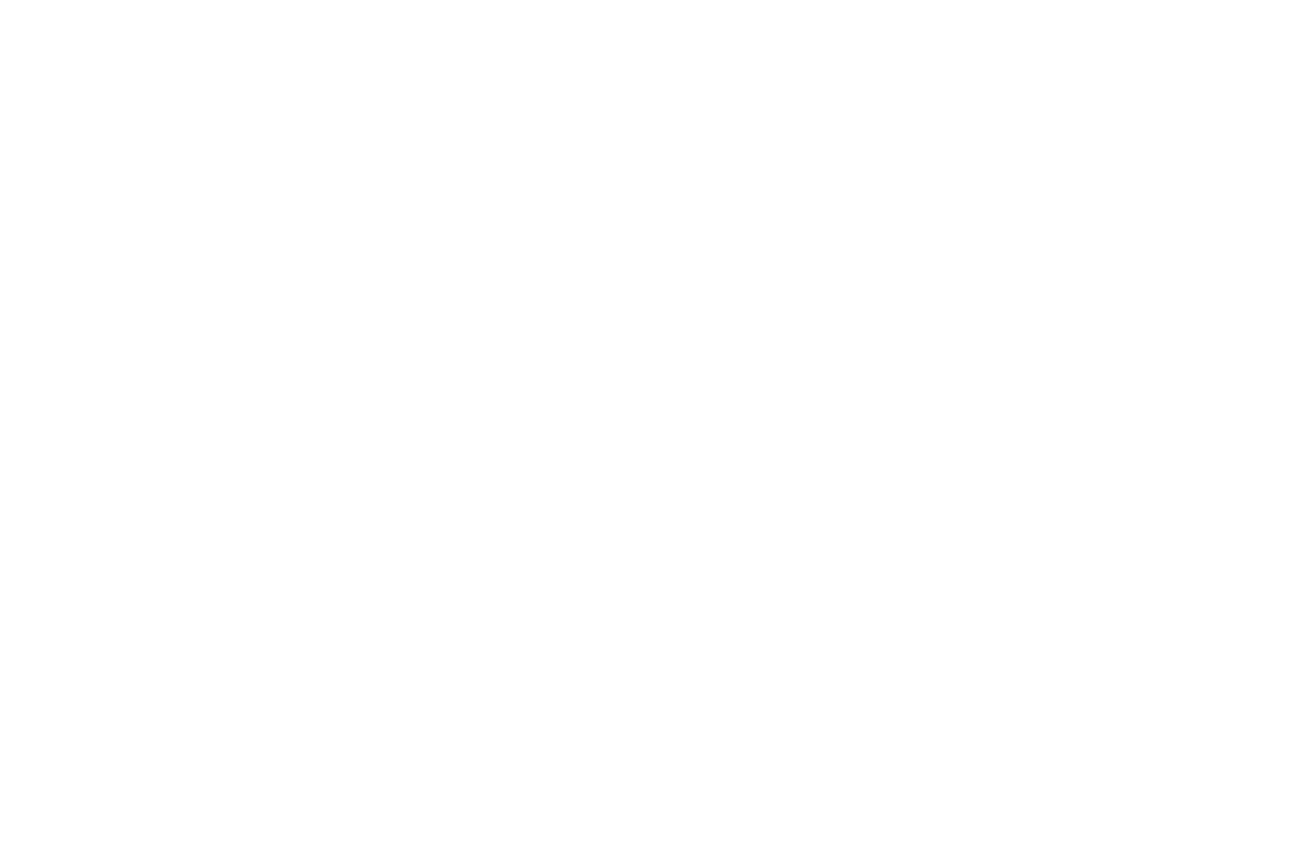

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [98]:
#Normalité des résidus:
## Calcul des résidus et résidus normalisés:
residus = pred_train - y_train 
residus_norm = (residus-residus.mean())/residus.std()
residus_std = residus/np.sqrt(sum(residus**2)/(len(residus)-1)) #utilisation des résidus standards pour test Jarque-Bera

# Graphes :
plt.figure(figsize = (15,10))
# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

## Graphe normalisation résidus:
plt.subplot(2,2,1)
stats.probplot(residus_norm, plot = plt)

## Graphe résidus en fonction de pred_train (valeurs ajustées):
plt.subplot(2,2,2)
plt.scatter(pred_train, residus)
plt.plot((pred_train.min(), pred_train.max()), (0, 0), lw=3, color='red')
plt.plot((pred_train.min(), pred_train.max()), (2*residus.std(), 2*residus.std()), 'r-', lw=1.5, label = '2 σ') 
plt.plot((pred_train.min(), pred_train.max()), (3*residus.std(), 3*residus.std()), 'r--', lw=1.5, label = '3 σ')
plt.plot((pred_train.min(), pred_train.max()), (-2*residus.std(), -2*residus.std()), 'r-',lw=1.5)
plt.plot((pred_train.min(), pred_train.max()), (-3*residus.std(), -3*residus.std()), 'r--', lw=1.5)
plt.title('Résidus en fonction de pred_train (valeurs ajustées)')
plt.xlabel('pred_train (valeurs ajustées)')
plt.ylabel('Résidus')
plt.legend()

## Graphe boxplot des résidus:
plt.subplot(2,2,3)
sns.boxplot(residus)
plt.title('Boite à moustache des résidus')
plt.xlabel('résidus')

## Graphe prédictions en fonction de y_test (= le long de la droite si elles sont bonnes):
plt.subplot(2,2,4)
plt.scatter(pred_test, y_test)
plt.title('Nuage de points entre pred_test et y_test')
plt.xlabel('pred_test')
plt.ylabel('y_test')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw = 3, color ='red');

L'ensemble des metrics du modèle affiné Diesel est légèrement moins bons que celui du modèle Diesel précedent, mais le nombre de variables a été divisé par 3. Pas de surajustement.

Par rapport au modèle Diesel simple, on constate, pour le modèle affiné Diesel:
   - Diminution des R2 de 2%
   - Augmentation des RMSE de moins 1 g/km
   - Augmentation des MAE de moins 0.8 g/km
   - Augmentation de l'erreur relative de 1%

Les MAE sont plus faibles.

Le modèle parvient à apprendre sur les données d'entraînement et à généraliser sur les données de test avec une erreur de 9% en moyenne

##### 1.3.1.4. Interprétation

#### **1.3.2. Analyse véhicules Essence uniquement**

##### 1.3.2.1. Création du dataset regroupant tous les véhicules Essence

In [99]:
# Création du Dataset des véhicules essence uniquement dataES:
dataES = data.join(target_reg)
dataES = dataES[(dataES['Carburant']==0)]
dataES = dataES.drop('Carburant', axis = 1)
dataES.describe()

puiss_max  masse_ordma_min       Marque  Carrosserie        boite  \
count  2057.000000      2057.000000  2057.000000  2057.000000  2057.000000   
mean    172.116091      1552.527467    22.922217     2.268352     0.466213   
std     106.856781       350.150020    14.520406     2.858691     0.498978   
min      44.000000       825.000000     0.000000     0.000000     0.000000   
25%      88.000000      1316.000000     7.000000     0.000000     0.000000   
50%     135.000000      1524.000000    29.000000     1.000000     0.000000   
75%     225.000000      1785.000000    33.000000     4.000000     1.000000   
max     541.000000      3115.000000    48.000000     9.000000     1.000000   

            gamme2          CO2  
count  2057.000000  2057.000000  
mean      2.521147   180.158483  
std       1.370430    61.017245  
min       0.000000    90.000000  
25%       2.000000   139.000000  
50%       2.000000   160.000000  
75%       3.000000   209.000000  
max       5.000000   397.000000

##### 1.3.2.2 Préparation du dataset  - Séparation en un jeu d'entrainement et de test - standardisation des variables numériques d'entrainement

In [100]:
# Séparation de la cible du jeu de données:
targetES = dataES.CO2
dataES1 = dataES.drop('CO2', axis = 1)

In [101]:
# Séparation du jeu de données en un jeu d'entrainement et de test:
X_train, X_test, y_train, y_test = train_test_split(dataES1, targetES, test_size = 0.2)

#Standardisation des valeurs numériques + variables 'Marque' (beaucoup de catégories (>10)):
cols = ['puiss_max', 'masse_ordma_min', 'Marque']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

display(X_train.head())
display(X_train.describe())

C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


puiss_max  masse_ordma_min    Marque  Carrosserie  boite  gamme2
679   -0.349667         0.683359 -1.323545            1      0       2
3922  -0.536338        -0.371879  0.401350            8      0       3
1071  -0.816343        -0.545342 -1.185553            9      1       1
3727  -0.769675        -0.458610  0.401350            8      1       3
5017  -0.209665        -0.010496  0.401350            4      0       5

puiss_max  masse_ordma_min        Marque  Carrosserie        boite  \
count  1.645000e+03     1.645000e+03  1.645000e+03  1645.000000  1645.000000   
mean  -5.567988e-17    -2.996590e-17  8.773799e-17     2.246201     0.471733   
std    1.000304e+00     1.000304e+00  1.000304e+00     2.838869     0.499352   
min   -1.199017e+00    -2.106516e+00 -1.599528e+00     0.000000     0.000000   
25%   -7.883424e-01    -6.609849e-01 -1.116557e+00     0.000000     0.000000   
50%   -3.496674e-01    -6.831696e-02  4.013499e-01     1.000000     0.000000   
75%    4.903486e-01     6.689041e-01  6.773330e-01     4.000000     1.000000   
max    3.439738e+00     4.514018e+00  1.712270e+00     9.000000     1.000000   

            gamme2  
count  1645.000000  
mean      2.530091  
std       1.367809  
min       0.000000  
25%       2.000000  
50%       2.000000  
75%       3.000000  
max       5.000000

##### 1.3.2.3 Création du modèle de régression   entraînement et évaluation du modèle

In [102]:
# Instanciation d'un modèle de régression linéaire
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Entraînement et prédictions:
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train) # = valeurs ajustées X_train
pred_test = lr.predict(X_test) # = valeurs ajustées X_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(X_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,X_train,y_train, cv = 5).mean(),2))
print("R2 modèle_test =", round(lr.score(X_test, y_test),2))
print('\nRMSE_train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
print('RMSE_test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),2))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(X_train.columns, coef)
plt.xticks(X_train.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle');

# Affichage de l'intercept:
print('\nIntercept =', round(lr.intercept_,2))

# Tableau des coefficients et des VIF (Multicolinéarité) par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(X_train.columns))

# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)

R2 modèle_train = 0.82
R2 obtenu par CV = 0.82
R2 modèle_test = 0.83

RMSE_train = 26.06
RMSE_test = 25.64

MAE_train: 19.88
MAE_test: 19.35

Erreur relative = 12.0 %

Intercept = 168.9


coefficient   VIF
puiss_max          45.590123  2.49
masse_ordma_min    12.675151  2.92
boite               8.664401  2.28
Carrosserie         2.264656  1.60
gamme2              0.706113  2.08
Marque             -0.148202  1.03

In [103]:
#Analyse statsmodel:
X = X_train
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1215.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:46:45   Log-Likelihood:                -7697.7
No. Observations:                1645   AIC:                         1.541e+04
Df Residuals:                    1638   BIC:                         1.545e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             168.8952      1.647    1

C:\Users\Christophe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>


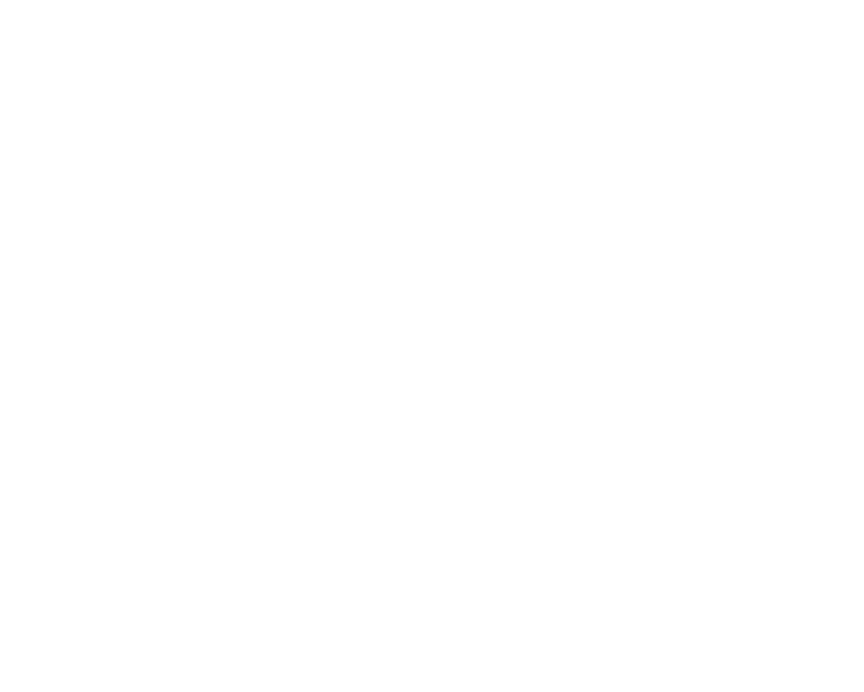

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [104]:
#Normalité des résidus:
## Calcul des résidus et résidus normalisés:
residus = pred_train - y_train 
residus_norm = residus_norm = residus/residus.std()
residus_std = residus/np.sqrt(sum(residus**2)/(len(residus)-1)) #utilisation des résidus standards pour test Jarque-Bera

# Graphes :
plt.figure(figsize = (10,8))
# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)
## Graphe normalisation résidus:
plt.subplot(2,2,1)
stats.probplot(residus_norm, plot = plt)
## Graphe résidus en fonction de pred_train (valeurs ajustées):
plt.subplot(2,2,2)
plt.scatter(pred_train, residus)
plt.plot((pred_train.min(), pred_train.max()), (0, 0), lw=3, color='red')
plt.plot((pred_train.min(), pred_train.max()), (2*residus.std(), 2*residus.std()), 'r-', lw=1.5, label = '2 σ') 
plt.plot((pred_train.min(), pred_train.max()), (3*residus.std(), 3*residus.std()), 'r--', lw=1.5, label = '3 σ')
plt.plot((pred_train.min(), pred_train.max()), (-2*residus.std(), -2*residus.std()), 'r-',lw=1.5)
plt.plot((pred_train.min(), pred_train.max()), (-3*residus.std(), -3*residus.std()), 'r--', lw=1.5)
plt.title('Résidus en fonction de pred_train (valeurs ajustées)')
plt.xlabel('pred_train (valeurs ajustées)')
plt.ylabel('Résidus')
plt.legend()
## Graphe boxplot des résidus:
plt.subplot(2,2,3)
sns.boxplot(residus)
plt.title('Boite à moustache des résidus')
plt.xlabel('résidus')
## Graphe prédictions en fonction de y_test (= le long de la droite si elles sont bonnes):
plt.subplot(2,2,4)
plt.scatter(pred_test, y_test)
plt.title('Nuage de points entre pred_test et y_test')
plt.xlabel('pred_test')
plt.ylabel('y_test')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw = 3, color ='red');

##### 1.3.2.4. Création du modèle de régression et d'un sélecteur,  entraînement et évaluation du modèle

In [105]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Création d'un sélecteur à partir de lr:
sfm = SelectFromModel(lr)

# Entrainement du selecteur et sauvegarde des colonnes de X_train sélectionnées par sfm dans sfm_train:
sfm_train = pd.DataFrame(sfm.fit_transform(X_train, y_train), index = X_train.index)
sfm_train = X_train[X_train.columns[sfm.get_support()]]

# Sauvegarde des colonnes de X_test dans sfm_test:
sfm_test = sfm.transform(X_test)
sfm_test = X_test[X_test.columns[sfm.get_support()]]

# Affichage des variables sélectionnées:
X_train.columns[sfm.get_support()]

Index(['puiss_max', 'masse_ordma_min'], dtype='object')

R2 modèle_train = 0.8
R2 obtenu par CV = 0.8
R2 modèle_test = 0.81

RMSE train = 27.1496
RMSE test = 26.7884

MAE_train: 20.08
MAE_test: 19.35

Erreur relative = 11.0 %


<IPython.core.display.Javascript object>


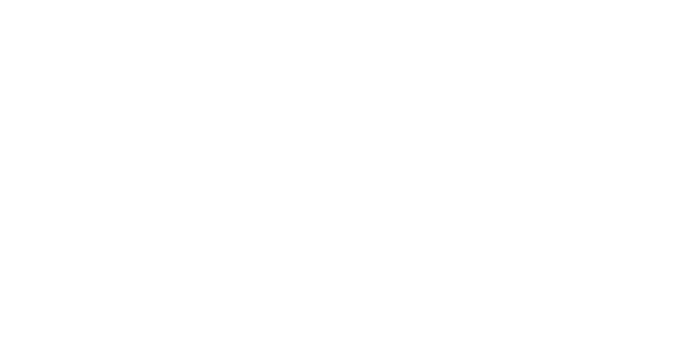

coefficient   VIF
puiss_max          43.285955  2.43
masse_ordma_min    13.639825  2.43

In [106]:
# Régression linéaire:
lr = LinearRegression()
lr.fit(sfm_train, y_train)
pred_train = lr.predict(sfm_train) # = valeurs ajustées sfm_train
pred_test = lr.predict(sfm_test) # = valeurs ajustées sfm_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(sfm_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,sfm_train,y_train).mean(),2))
print("R2 modèle_test =", round(lr.score(sfm_test, y_test),2))
print('\nRMSE train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),4))
print('RMSE test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),4))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / targetES.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.figure(figsize = (8,4))
plt.bar(sfm_train.columns, coef)
plt.xticks(sfm_train.columns)
plt.title('Reprsentation des coefficients de chaque variable du modèle')
;

# Tableau des coefficients et des VIF (Multicolinéarité)par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(sfm_train.columns))
# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(sfm_train.values, i),2) for i in range(sfm_train.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)

In [107]:
#Analyse statsmodel:
X = sfm_train
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     3303.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:46:45   Log-Likelihood:                -7764.9
No. Observations:                1645   AIC:                         1.554e+04
Df Residuals:                    1642   BIC:                         1.555e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             179.8559      0.670    2

C:\Users\Christophe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>


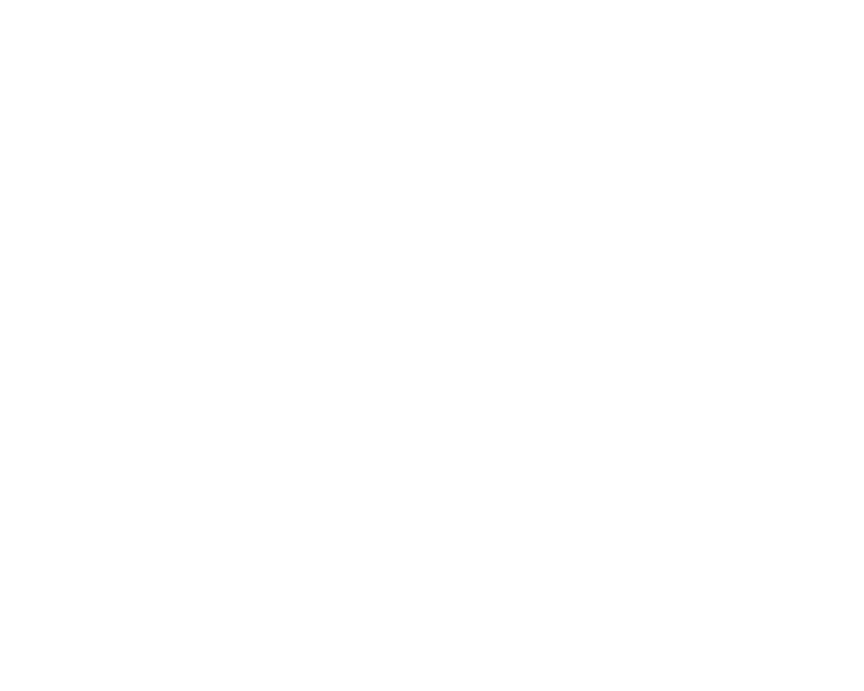

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [108]:
#Normalité des résidus:
## Calcul des résidus et résidus normalisés:
residus = pred_train - y_train 
residus_norm = (residus-residus.mean())/residus.std()
residus_std = residus/np.sqrt(sum(residus**2)/(len(residus)-1)) #utilisation des résidus standards pour test Jarque-Bera

# Graphes :
plt.figure(figsize = (10,8))
# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)
## Graphe normalisation résidus:
plt.subplot(2,2,1)
stats.probplot(residus_norm, plot = plt)
## Graphe résidus en fonction de pred_train (valeurs ajustées):
plt.subplot(2,2,2)
plt.scatter(pred_train, residus)
plt.plot((pred_train.min(), pred_train.max()), (0, 0), lw=3, color='red')
plt.plot((pred_train.min(), pred_train.max()), (2*residus.std(), 2*residus.std()), 'r-', lw=1.5, label = '2 σ') 
plt.plot((pred_train.min(), pred_train.max()), (3*residus.std(), 3*residus.std()), 'r--', lw=1.5, label = '3 σ')
plt.plot((pred_train.min(), pred_train.max()), (-2*residus.std(), -2*residus.std()), 'r-',lw=1.5)
plt.plot((pred_train.min(), pred_train.max()), (-3*residus.std(), -3*residus.std()), 'r--', lw=1.5)
plt.title('Résidus en fonction de pred_train (valeurs ajustées)')
plt.xlabel('pred_train (valeurs ajustées)')
plt.ylabel('Résidus')
plt.legend()
## Graphe boxplot des résidus:
plt.subplot(2,2,3)
sns.boxplot(residus)
plt.title('Boite à moustache des résidus')
plt.xlabel('résidus')
## Graphe prédictions en fonction de y_test (= le long de la droite si elles sont bonnes):
plt.subplot(2,2,4)
plt.scatter(pred_test, y_test)
plt.title('Nuage de points entre pred_test et y_test')
plt.xlabel('pred_test')
plt.ylabel('y_test')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw = 3, color ='red');

### **1.4. Analyse des résidus**

In [109]:
#Calculs résidus, résidus normalisés, distance de cook:
## résidus:
residus = pred_train - y_train

## résidus normalisés:
residus_norm = residus/residus.std()

# distance de Cook (= identification des points trop influents):
influence = results.get_influence() # results DOIT être un model de statsmodels
(c, p) = influence.cooks_distance  # c = distance et p = p-value

# AJOUT DES VARIABLES CALCULEES A DF (pred_train, résidus, résidus normalisés et distance de cook)

#PRED_TRAIN:

## Création d'un DataFrame stockant pred_train en conservant les index et arrondir à une décimale:
y_pred = pd.DataFrame(pred_train, index = sfm_train.index)
y_pred.rename(columns ={0:'pred_train'}, inplace = True)
y_pred = round(y_pred.pred_train,1)

## Création df1 (= Ajout de pred_train à df):
df1 = df.join(y_pred)

## Suppression des Nans:
df1 = df1.dropna(subset=['pred_train'])


#RESIDUS:

## Création d'un DataFrame stockant les résidus:
res = pd.DataFrame(residus)
res.rename(columns ={'CO2':'residus'}, inplace = True)

## Ajout des résidus à df1:
df1 = df1.join(res)


# RESIDUS NORMALISES:

## Création d'un DataFrame stockant les résidus noramlisés:
res_norm = pd.DataFrame(residus_norm)
res_norm.rename(columns ={'CO2':'residus_normalisés'}, inplace = True)

## Ajout des résidus normalisés à df1:
df1 = df1.join(res_norm)

## Labelisation des résidus normalisés à 2 écarts-types:
liste = []
for residus in df1.residus_normalisés:
    if residus >2 or residus <-2:
        liste.append('res norm ±2 σ')
    else:
        liste.append('ok')
## ajout liste (=résidus normalisés labélisés à 2 EC) à df1:
df1['res_norm_±2_σ'] = liste

## Labelisation des résidus normalisés à 3 écarts-types:
liste = []
for residus in df1.residus_normalisés:
    if residus >3 or residus <-3:
        liste.append('res norm ±3 σ')
    else:
        liste.append('ok')
## ajout liste (=résidus normalisés labélisés à 3 EC) à df1:
df1['res_norm_±3_σ'] = liste

# DISTANCE DE COOK:

## Création d'un DataFrame stockant les distances de Cook:
dist_cook = pd.DataFrame(c, index = res_norm.index)
dist_cook.rename(columns ={0:'dist_cook'}, inplace = True)

## Ajout des distances de Cook à df1:
df1 = df1.join(dist_cook)

## Labelisation des distances de Cook:
liste = []
for dist in df1.dist_cook:
    if dist > 4/len(y_train) or dist > 1:
        liste.append('oui')
    else:
        liste.append('non')
## ajout liste (=résidus normalisés labélisés à 3 EC) à df1:
df1['observation_influente'] = liste
df1.head()

Marque Carburant  puiss_max    CO2  masse_ordma_min Carrosserie boite  \
0   ALFA-ROMEO        ES      147.0  182.0             1505       BREAK     M   
6   ALFA-ROMEO        ES      147.0  186.0             1555       BREAK     M   
12  ALFA-ROMEO        ES      331.0  379.0             1750   CABRIOLET     M   
14  ALFA-ROMEO        ES      147.0  189.0             1505       COUPE     M   
20  ALFA-ROMEO        ES       88.0  149.0             1355     BERLINE     M   

            gamme2 Cat_CO2  pred_train     residus  residus_normalisés  \
0   MOY-SUPERIEURE       E       167.7  -14.349311           -0.528366   
6   MOY-SUPERIEURE       E       169.6  -16.377631           -0.603052   
12            LUXE       G       251.6 -127.350252           -4.689252   
14  MOY-SUPERIEURE       E       167.7  -21.349311           -0.786118   
20  MOY-INFERIEURE       D       137.9  -11.100936           -0.408755   

    res_norm_±2_σ  res_norm_±3_σ  dist_cook observation_influente  
0              ok             ok   0.000060                   non  
6              ok             ok   0.000084                   non  
12  res norm ±2 σ  res norm ±3 σ   0.017764                   oui  
14             ok             ok   0.000133                   non  
20             ok             ok   0.000055                   non

In [110]:
# Validation des points aberrants à 2 et 3 écarts-types:
print('Pourcentage valeurs aberrantes à 2 ecarts-types (doit être <0.05) =',round(df1[(df1['residus_normalisés']>2)|(df1['residus_normalisés']<-2)].residus_normalisés.count()/df1.residus_normalisés.count(), 3))
print('Pourcentage valeurs aberrantes à 3 ecarts-types (doit être <0.003) =',round(df1[(df1['residus_normalisés']>3)|(df1['residus_normalisés']<-3)].residus_normalisés.count()/df1.residus_normalisés.count(), 3))

# Description des résidus élevés (+ ou - 3 EC):
df1[(df1['residus_normalisés']>3)|(df1['residus_normalisés']<-3)].describe()

Pourcentage valeurs aberrantes à 2 ecarts-types (doit être <0.05) = 0.063
Pourcentage valeurs aberrantes à 3 ecarts-types (doit être <0.003) = 0.01


puiss_max         CO2  masse_ordma_min  pred_train     residus  \
count   17.000000   17.000000        17.000000   17.000000   17.000000   
mean   312.352941  348.352941      1964.882353  252.600000  -95.763207   
std    100.076809   42.014791       431.829666   40.947405   11.497266   
min     61.000000  225.000000      1285.000000  124.200000 -127.350252   
25%    285.000000  332.000000      1625.000000  246.400000  -99.948983   
50%    316.000000  348.000000      1835.000000  255.300000  -93.246232   
75%    380.000000  379.000000      2315.000000  276.700000  -90.945265   
max    420.000000  393.000000      2760.000000  310.100000  -81.516936   

       residus_normalisés  dist_cook  
count           17.000000  17.000000  
mean            -3.526163   0.022639  
std              0.423349   0.016167  
min             -4.689252   0.004884  
25%             -3.680291   0.009861  
50%             -3.433484   0.017764  
75%             -3.348759   0.031791  
max             -3.001592   0.070066

In [111]:
# Affichage des résidus élevés (+ ou - 3 EC):
df1[(df1['res_norm_±3_σ']!='ok')]

Marque Carburant  puiss_max    CO2  masse_ordma_min  \
12       ALFA-ROMEO        ES      331.0  379.0             1750   
143    ASTON MARTIN        ES      380.0  388.0             1835   
388            AUDI        ES      316.0  332.0             1635   
394            AUDI        ES      316.0  337.0             1735   
443         BENTLEY        ES      377.0  393.0             2760   
2529           JEEP        ES      259.0  329.0             2382   
2669           LADA        ES       61.0  225.0             1285   
2858          LEXUS        ES      412.0  379.0             1555   
2860          LEXUS        ES      412.0  379.0             1615   
2866          LEXUS        ES      420.0  379.0             1585   
2868          LEXUS        ES      420.0  379.0             1625   
2969       MASERATI        ES      298.0  330.0             1955   
2970       MASERATI        ES      338.0  360.0             1955   
8442  MERCEDES-BENZ        ES      285.0  348.0             2315   
8444  MERCEDES-BENZ        ES      285.0  348.0             2300   
8448  MERCEDES-BENZ        ES      285.0  348.0             2530   
9560  MERCEDES-BENZ        ES      115.0  289.0             2586   

              Carrosserie boite          gamme2 Cat_CO2  pred_train  \
12              CABRIOLET     M            LUXE       G       251.6   
143                 COUPE     M            LUXE       G       274.8   
388                 COUPE     M            LUXE       G       241.1   
394                 COUPE     M            LUXE       G       245.0   
443               BERLINE     A            LUXE       G       310.1   
2529  TS TERRAINS/CHEMINS     A      SUPERIEURE       G       247.5   
2669  TS TERRAINS/CHEMINS     M      INFERIEURE       F       124.2   
2858                COUPE     A            LUXE       G       276.7   
2860                COUPE     A            LUXE       G       279.1   
2866                COUPE     A            LUXE       G       281.1   
2868                COUPE     A            LUXE       G       282.7   
2969            CABRIOLET     A            LUXE       G       246.4   
2970                COUPE     A            LUXE       G       262.6   
8442  TS TERRAINS/CHEMINS     A            LUXE       G       255.3   
8444  TS TERRAINS/CHEMINS     A            LUXE       G       254.8   
8448  TS TERRAINS/CHEMINS     A            LUXE       G       263.8   
9560              MINIBUS     A  MOY-INFERIEURE       G       197.4   

         residus  residus_normalisés  res_norm_±2_σ  res_norm_±3_σ  dist_cook  \
12   -127.350252           -4.689252  res norm ±2 σ  res norm ±3 σ   0.017764   
143  -113.201910           -4.168286  res norm ±2 σ  res norm ±3 σ   0.020725   
388   -90.945265           -3.348759  res norm ±2 σ  res norm ±3 σ   0.009861   
394   -92.001905           -3.387666  res norm ±2 σ  res norm ±3 σ   0.007956   
443   -82.937865           -3.053913  res norm ±2 σ  res norm ±3 σ   0.028041   
2529  -81.516936           -3.001592  res norm ±2 σ  res norm ±3 σ   0.017175   
2669 -100.769556           -3.710506  res norm ±2 σ  res norm ±3 σ   0.005820   
2858 -102.314999           -3.767412  res norm ±2 σ  res norm ±3 σ   0.038289   
2860  -99.948983           -3.680291  res norm ±2 σ  res norm ±3 σ   0.032667   
2866  -97.899911           -3.604841  res norm ±2 σ  res norm ±3 σ   0.035318   
2868  -96.322568           -3.546760  res norm ±2 σ  res norm ±3 σ   0.031791   
2969  -83.598693           -3.078245  res norm ±2 σ  res norm ±3 σ   0.004884   
2970  -97.438296           -3.587843  res norm ±2 σ  res norm ±3 σ   0.008865   
8442  -92.654728           -3.411704  res norm ±2 σ  res norm ±3 σ   0.016238   
8444  -93.246232           -3.433484  res norm ±2 σ  res norm ±3 σ   0.015744   
8448  -84.176505           -3.099521  res norm ±2 σ  res norm ±3 σ   0.023659   
9560  -91.649913           -3.374705  res norm ±2 σ  res norm ±3 σ   0.070066   

     observation_influente  
12                   

C:\Users\Christophe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


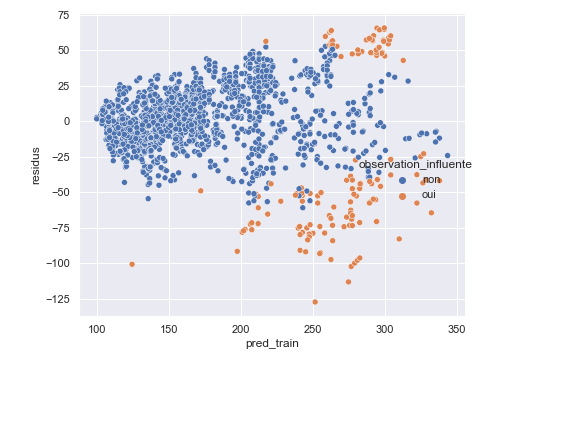

In [112]:
#Calculs résidus, résidus normalisés, distance de cook:
## résidus:
residus = pred_train - y_train

## résidus normalisés:
residus_norm = residus/residus.std()

# distance de Cook (= identification des points trop influents):
influence = results.get_influence() # results DOIT être un model de statsmodels
(c, p) = influence.cooks_distance  # c = distance et p = p-value

sns.relplot(df1.pred_train, df1.residus , hue=df1['observation_influente'])
plt.plot((pred_train.min(), pred_train.max()), (0, 0), lw=3, color='red')
plt.plot((pred_train.min(), pred_train.max()), (2*residus.std(), 2*residus.std()), 'r-', lw=1.5, label = '2 σ') 
plt.plot((pred_train.min(), pred_train.max()), (3*residus.std(), 3*residus.std()), 'r--', lw=1.5, label = '3 σ')
plt.plot((pred_train.min(), pred_train.max()), (-2*residus.std(), -2*residus.std()), 'r-',lw=1.5)
plt.plot((pred_train.min(), pred_train.max()), (-3*residus.std(), -3*residus.std()), 'r--', lw=1.5)
plt.title('Résidus en fonction de pred_train (valeurs ajustées)')
plt.xlabel('pred_train (valeurs ajustées)')
plt.ylabel('Résidus')
plt.legend();

<IPython.core.display.Javascript object>


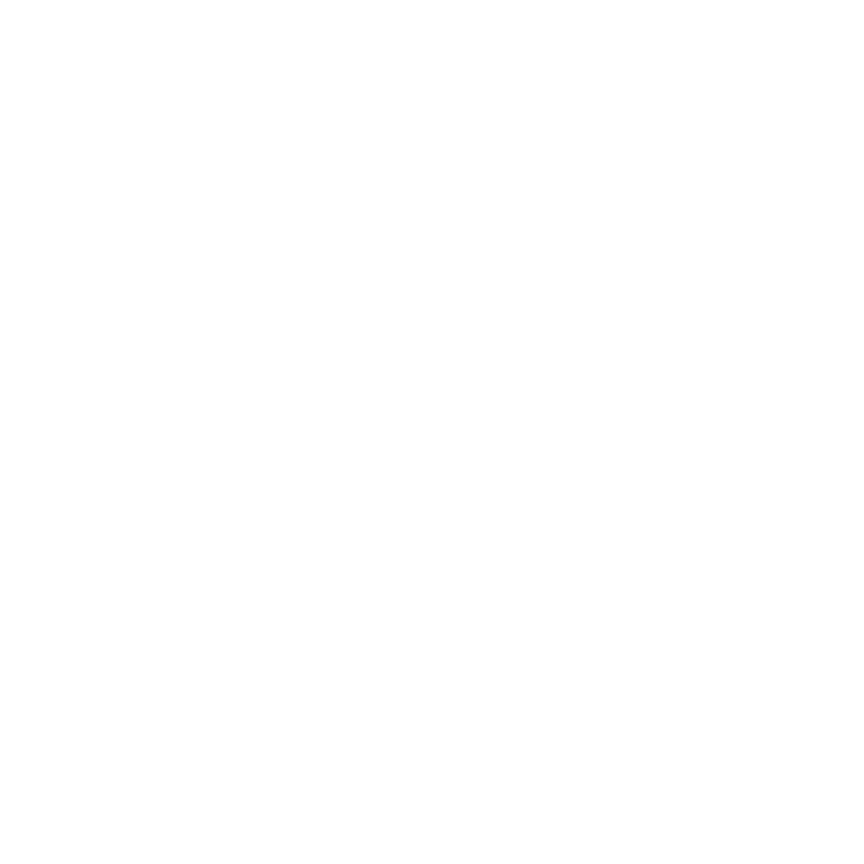

In [113]:
# Représentation graphique des résidus - de quoi sont composés ces résidus élevés? - qu'est-ce qui les caractérisent?:

# Analyse des résidus élevées à ±2σ:
EC = 2

# Représentation graphique des résidus - de quoi sont composés ces résidus élevés?:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# Graphe Marque:
plt.subplot(311)
plt.pie(df1.Marque[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts(),
        labels = df1.Marque[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts().index,
       autopct = lambda x: str(round(x,2))+'%',
       shadow =True)
plt.title('Répartition des marques des résidus élevées à ±2σ');

# Graphe Carburant:
plt.subplot(312)
plt.pie(df1.Carrosserie[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts(),
        labels = df1.Carrosserie[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts().index,
        autopct = lambda x: str(round(x,2))+'%',
       shadow =True)
plt.title('Répartition des carrosseries des résidus élevées à ±2σ');

# Graphe gamme:
plt.subplot(313)
plt.pie(df1.gamme2[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts(),
        labels = df1.gamme2[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts().index,
       autopct = lambda x: str(round(x,2))+'%',
       shadow =True)
plt.title('Répartition des gammes des résidus élevées à ±2σ');

<IPython.core.display.Javascript object>


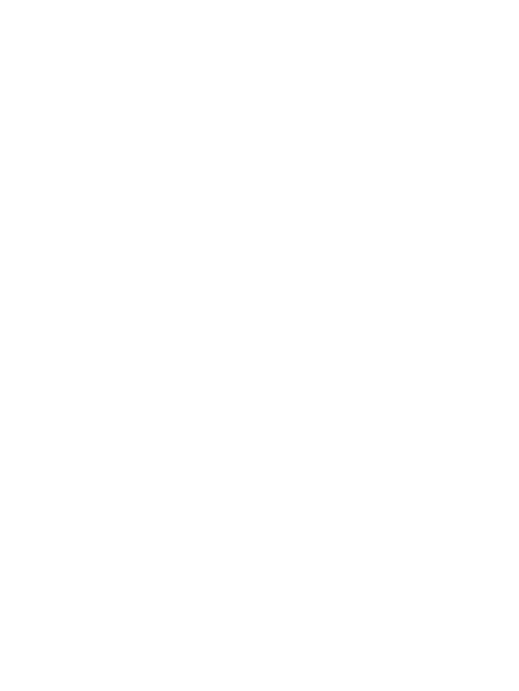

In [114]:
plt.figure(figsize = (6,8))
plt.subplot(211)
sns.boxplot(data = df1, x = 'res_norm_±2_σ', y = 'puiss_max')
plt.title('Comparaison des puissance max en fonction de la valeur des résidus')
plt.subplot(212)
sns.boxplot(data = df1, x = 'res_norm_±2_σ', y = 'masse_ordma_min')
plt.title('Comparaison des masses des véhicules en fonction de la valeur des résidus')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4);

<IPython.core.display.Javascript object>


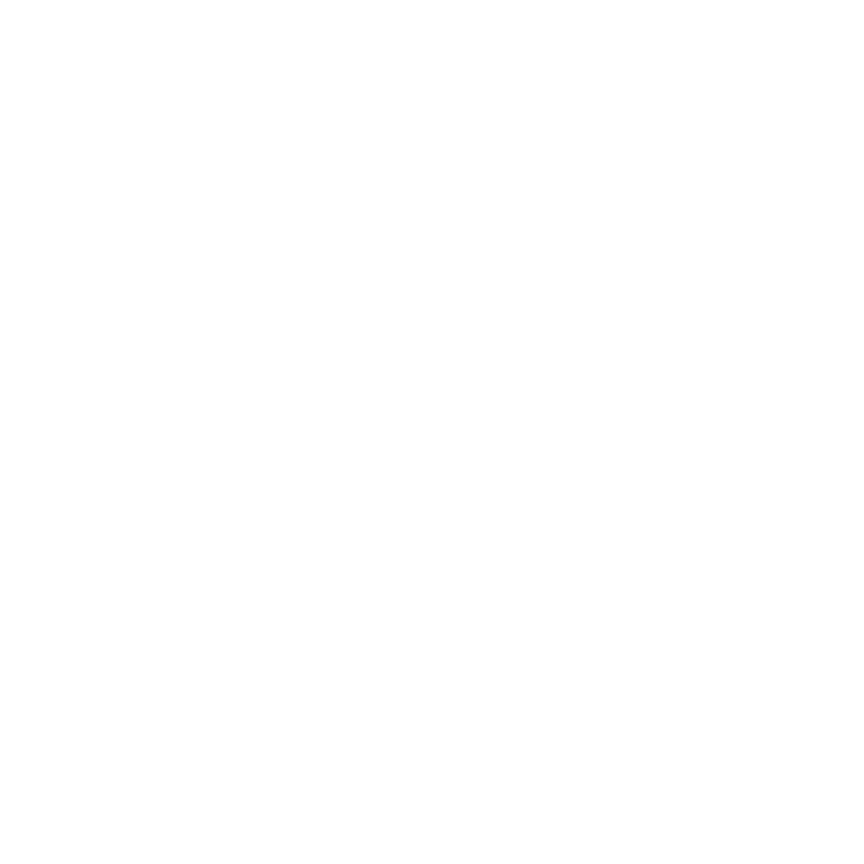

In [115]:
# Représentation graphique des résidus - de quoi sont composés ces résidus élevés? - qu'est-ce qui les caractérisent?:

# Analyse des résidus élevées à ±3σ:
EC = 3

# Représentation graphique des résidus - de quoi sont composés ces résidus élevés?:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# Graphe Marque:
plt.subplot(311)
plt.pie(df1.Marque[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts(),
        labels = df1.Marque[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts().index,
       autopct = lambda x: str(round(x,2))+'%',
       shadow =True)
plt.title('Répartition des marques des résidus élevées à ±3σ');

# Graphe Carburant:
plt.subplot(312)
plt.pie(df1.Carrosserie[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts(),
        labels = df1.Carrosserie[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts().index,
        autopct = lambda x: str(round(x,2))+'%',
       shadow =True)
plt.title('Répartition des carrosseries des résidus élevées à ±3σ');

# Graphe gamme:
plt.subplot(313)
plt.pie(df1.gamme2[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts(),
        labels = df1.gamme2[(df1['residus_normalisés']>EC)|(df1['residus_normalisés']<-EC)].value_counts().index,
       autopct = lambda x: str(round(x,2))+'%',
       shadow =True)
plt.title('Répartition des gammes des résidus élevées à ±3σ');

<IPython.core.display.Javascript object>


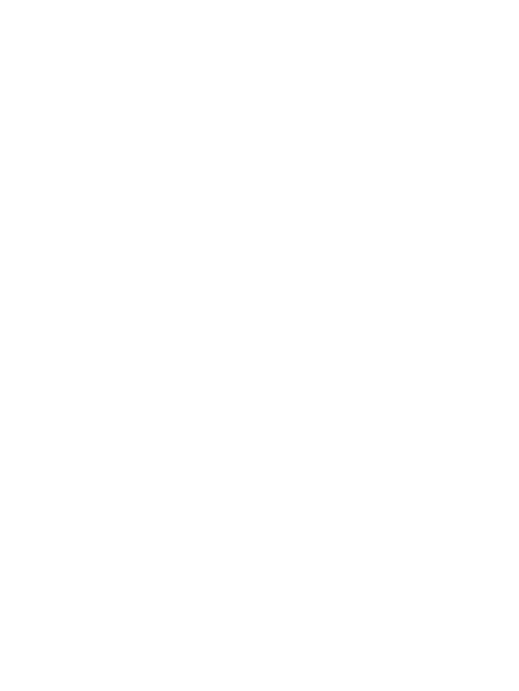

In [116]:
plt.figure(figsize = (6,8))
plt.subplot(211)
sns.boxplot(data = df1, x = 'res_norm_±3_σ', y = 'puiss_max')
plt.title('Comparaison des puissance max en fonction de la valeur des résidus')
plt.subplot(212)
sns.boxplot(data = df1, x = 'res_norm_±3_σ', y = 'masse_ordma_min')
plt.title('Comparaison des masses des véhicules en fonction de la valeur des résidus')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4);

Les véhicules s'écartant le plus du modèle linéaire sont des véhcicules type coupé ou 4x4 (Aston Martin, Masérati, Mercedes-Benz) très puissants.

## 2. Classification multiple

### Déterminer la classe du véhicule selon les normes européennes

Afin d'effectuer des classifications multiples, nous avons sélectionné les 3 classifieurs suivants :
- SVC
- KNN
- Random Forest 

De prime abord, toutes les variables qualitatives ne seraient pas utiles dans la modélisation. Les variables qui nous semblent avoir un impact sur les émissions de CO2 sont : 
- le type de boîte de vitesse
- le carburant

### 2.1. *Revue des variables d'intérêt*

In [117]:
# Les variables catégorielles sont transformées en indicatrices
var_cat_ind = pd.get_dummies(var_cat, drop_first = True)

# On récupère les variables explicatives
feats = var_num.join(var_cat_ind)
feats.head()

puiss_max  masse_ordma_min  Marque_ASTON MARTIN  Marque_AUDI  \
0      147.0             1505                    0            0   
1      125.0             1565                    0            0   
2      100.0             1565                    0            0   
4      125.0             1565                    0            0   
6      147.0             1555                    0            0   

   Marque_BENTLEY  Marque_BMW  Marque_CADILLAC  Marque_CHEVROLET  \
0               0           0                0                 0   
1               0           0                0                 0   
2               0           0                0                 0   
4               0           0                0                 0   
6               0           0                0                 0   

   Marque_CITROEN  Marque_DACIA  ...  Carrosserie_MINISPACE  \
0               0             0  ...                      0   
1               0             0  ...                      0   
2               0             0  ...                      0   
4               0             0  ...                      0   
6               0             0  ...                      0   

   Carrosserie_MONOSPACE  Carrosserie_MONOSPACE COMPACT  \
0                      0                              0   
1                      0                              0   
2                      0                              0   
4                      0                              0   
6                      0                              0   

   Carrosserie_TS TERRAINS/CHEMINS  boite_M  gamme2_INFERIEURE  gamme2_LUXE  \
0                                0        1                  0            0   
1                                0        1                  0            0   
2                                0        1                  0            0   
4                                0        1                  0            0   
6                                0        1                  0            0   

   gamme2_MOY-INFERIEURE  gamme2_MOY-SUPERIEURE  gamme2_SUPERIEURE  
0                      0                      1                  0  
1                      0                      1                  0  
2                      0                      1                  0  
4                      0                      1                  0  
6                      0                      1                  0  

[5 rows x 66 columns]

In [118]:
# Distribution de la variable cible de classification
target_class.value_counts(normalize = True)
# On a une distribution légèrement déséquilibrée

E    0.230171
D    0.209247
C    0.199283
F    0.139896
B    0.125548
G    0.059187
A    0.036668
Name: Cat_CO2, dtype: float64

#### *Séparation en données d'entraînement et de test*

In [119]:
# Pour rappel, le dataset feats regroupe les variables numériques et catégorielles
X_train, X_test, y_train, y_test = train_test_split(feats, target_class, test_size = 0.25, stratify = target_class)

In [120]:
# Les variables numériques doivent être standardisées
cols = ['puiss_max', 'masse_ordma_min']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Christophe\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### 2.2. *Classifieur 1 : SVC*

In [121]:
# Instanciation du classifieur
clf_svc = SVC(gamma = 'scale')        

clf_svc.fit(X_train, y_train)        # Entraînement du classifieur

y_pred_svc = clf_svc.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

Classes prédites SVC  A    B    C    D    E    F   G
Classes réelles                                     
A                     8   35    3    0    0    0   0
B                     5  109   40    3    0    0   0
C                     0   21  187   41    1    0   0
D                     0    3   47  179   34    0   0
E                     0    0    5   54  219   10   1
F                     0    0    0    0   22  151   3
G                     0    0    0    0    0   20  54

In [122]:
# Accuracy de clf_svc2
acc_svc = accuracy_score(y_test, y_pred_svc)

# Affichage des métriques
print("L'accuracy de clf_svc est de", acc_svc)

# Enregistrement du modèle
dump(clf_svc, 'clf_svc.joblib')

L'accuracy de clf_svc est de 0.7227091633466135


['clf_svc.joblib']

#### *Optimisation du classifieur SVC - Choix des hyperparamètres*

Tout comme précédemment, les hyperparamètres évalués sont :
- C : doit être strictement positif
- kernel
- gamma :'scale' 'auto' ou des nombres décimaux

In [123]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 

parametres= {
        'C' :[1,50,100,200],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' :[0.05,0.07,0.1,0.2,0.5,1]
}

# On applique la fonction gridsearch au modèle SVC
grid_svc=GridSearchCV(clf_svc,parametres)

# On entraîne grid_svc sur l'ensemble d'entraînement
grille=grid_svc.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le SVC sont ',grille.best_params_)

les meilleurs paramètres pour le SVC sont  {'C': 50, 'gamma': 0.2, 'kernel': 'rbf'}


In [124]:
# On refait les prédictions de classe avec les paramètres optimisés
y_pred_svc_grid =grid_svc.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

Classes prédites SVC   A    B    C    D    E    F   G
Classes réelles                                      
A                     23   21    2    0    0    0   0
B                     13  111   31    2    0    0   0
C                      3   22  179   43    3    0   0
D                      0    2   33  193   35    0   0
E                      0    1    4   38  233   12   1
F                      0    0    0    0   13  153  10
G                      0    0    0    0    2    9  63

In [125]:
# Accuracy de clf_svc2 optimisé
acc_svc_grid = accuracy_score(y_test, y_pred_svc_grid)

# Affichage des métriques
print("L'accuracy de clf_svc_grid est de", acc_svc_grid)

print('\n', classification_report(y_test, y_pred_svc_grid))

L'accuracy de clf_svc_grid est de 0.7609561752988048

               precision    recall  f1-score   support

           A       0.59      0.50      0.54        46
           B       0.71      0.71      0.71       157
           C       0.72      0.72      0.72       250
           D       0.70      0.73      0.72       263
           E       0.81      0.81      0.81       289
           F       0.88      0.87      0.87       176
           G       0.85      0.85      0.85        74

    accuracy                           0.76      1255
   macro avg       0.75      0.74      0.75      1255
weighted avg       0.76      0.76      0.76      1255



### 2.3. *Classifieur 2 : KNN*

In [126]:
# Instanciation du classifieur
clf_knn = KNeighborsClassifier()       

clf_knn.fit(X_train, y_train)         # Entraînement du classifieur

y_pred_knn = clf_knn.predict(X_test)  # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])


Classes prédites KNN   A   B    C    D    E    F   G
Classes réelles                                     
A                     18  23    5    0    0    0   0
B                     19  94   43    1    0    0   0
C                      2  48  155   38    7    0   0
D                      0  22   66  136   38    1   0
E                      0   7   10   56  200   15   1
F                      0   0    0    1   31  138   6
G                      0   0    0    0    2   12  60

In [127]:
# Accuracy de clf_knn2
acc_knn = accuracy_score(y_test, y_pred_knn)

# Affichage des métriques
print("L'accuracy de clf_knn est de", acc_knn)

# Enregistrement du modèle
dump(clf_knn, 'clf_knn.joblib')

L'accuracy de clf_knn est de 0.6382470119521912


['clf_knn.joblib']

#### *Optimisation du classifieur KNN - Choix des hyperparamètres*

Comme précédemment, les hyperparamètres sélectionnés sont:
- n_neighbors
- leaf_size
- p
- metric afin de déterminer sur quelle etendue on peut faire jouer les hyper paramètres

In [128]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 

parametres_knn= {
    'leaf_size'  :list(range(1,5)),
    'n_neighbors': list(range(1,10)),
    'p':[1,2],
    'metric': ['minkowski','manhattan','chebyshev']
}

#on applique la fonction gridsearch au modèle knn
grid_knn = GridSearchCV(clf_knn,parametres_knn)

#on entraîne grid_knn sur l'ensemble d'entraînement
grille_knn = grid_knn.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le KNN sont ',grille_knn.best_params_)

les meilleurs paramètres pour le KNN sont  {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1}


In [129]:
# On refait les prédictions de classe avec les paramètres optimisés
y_pred_knn_grid = grid_knn.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])

Classes prédites KNN   A    B    C    D    E    F   G
Classes réelles                                      
A                     30   16    0    0    0    0   0
B                     17  101   35    3    1    0   0
C                      2   32  172   37    7    0   0
D                      0    8   45  167   43    0   0
E                      1    0    4   33  230   21   0
F                      0    0    0    1   35  136   4
G                      0    0    0    0    0    6  68

In [130]:
# Accuracy de clf_knn2 optimisé
acc_knn_grid = accuracy_score(y_test, y_pred_knn_grid)

# Affichage des métriques
print("L'accuracy de clf_knn est de", acc_knn_grid)

# Enregistrement du modèle
dump(grid_knn, 'clf_knn_grid.joblib')

print('\n', classification_report(y_test, y_pred_knn))

L'accuracy de clf_knn est de 0.7203187250996016

               precision    recall  f1-score   support

           A       0.46      0.39      0.42        46
           B       0.48      0.60      0.54       157
           C       0.56      0.62      0.59       250
           D       0.59      0.52      0.55       263
           E       0.72      0.69      0.71       289
           F       0.83      0.78      0.81       176
           G       0.90      0.81      0.85        74

    accuracy                           0.64      1255
   macro avg       0.65      0.63      0.64      1255
weighted avg       0.65      0.64      0.64      1255



### 2.4. *Classifieur 3 : Random Forest*

In [131]:
# Instanciation du classifieur
clf_rf = RandomForestClassifier()     

clf_rf.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_rf = clf_rf.predict(X_test)   # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

Classes prédites RF   A    B    C    D    E    F   G
Classes réelles                                     
A                    29   15    2    0    0    0   0
B                     9  117   29    2    0    0   0
C                     0   24  185   38    3    0   0
D                     0    0   41  185   37    0   0
E                     0    0    5   32  235   17   0
F                     0    0    0    0   22  150   4
G                     0    0    0    0    0    7  67

In [132]:
# Accuracy de clf_rf2
acc_rf = accuracy_score(y_test, y_pred_rf)

# Affichage des métriques
print("L'accuracy de clf_rf est de", acc_rf)

# Enregistrement du modèle
dump(clf_rf, 'clf_rf.joblib')

print('\n', classification_report(y_test, y_pred_rf))

L'accuracy de clf_rf est de 0.7713147410358566

               precision    recall  f1-score   support

           A       0.76      0.63      0.69        46
           B       0.75      0.75      0.75       157
           C       0.71      0.74      0.72       250
           D       0.72      0.70      0.71       263
           E       0.79      0.81      0.80       289
           F       0.86      0.85      0.86       176
           G       0.94      0.91      0.92        74

    accuracy                           0.77      1255
   macro avg       0.79      0.77      0.78      1255
weighted avg       0.77      0.77      0.77      1255



#### *Optimisation du classifieur Random Forest - Choix des hyperparamètres*

Les hyperparamètres sur lesquels on peut jouer sont:
- n_estimators
- criterion
- max_depth
- n_jobs

In [133]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 

parametres_rf= {
    'n_estimators':[200,300,400,500,600,700],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'random_state': [i for i in range(0, 101)]
   
}

# On applique la fonction gridsearch au modèle rf
grid_rf=GridSearchCV(clf_rf,param_grid=parametres_rf,cv=5)

#on entraîne grid_rf sur l'ensemble d'entraînement
grille_rf=grid_rf.fit(X_train, y_train)

In [134]:
# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le RF sont ',grille_rf.best_params_)

les meilleurs paramètres pour le RF sont  {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 600}


In [135]:
# On refait les prédictions de classe avec les paramètres optimisés
y_pred_rf_grid =grille_rf.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

Classes prédites RF   A    B    C    D    E    F   G
Classes réelles                                     
A                    27   17    2    0    0    0   0
B                    10  117   28    2    0    0   0
C                     0   23  188   36    3    0   0
D                     0    0   40  185   38    0   0
E                     0    0    4   35  237   13   0
F                     0    0    0    0   24  148   4
G                     0    0    0    0    0    7  67

In [136]:
# Accuracy de clf_rf optimisé
acc_rf_grid = accuracy_score(y_test, y_pred_rf_grid)

# Affichage des métriques
print("L'accuracy de clf_rf est de", acc_rf_grid)

# Enregistrement du modèle
dump(grid_rf, 'clf_rf_grid.joblib')

print('\n', classification_report(y_test, y_pred_rf_grid))

L'accuracy de clf_rf est de 0.7721115537848605

               precision    recall  f1-score   support

           A       0.73      0.59      0.65        46
           B       0.75      0.75      0.75       157
           C       0.72      0.75      0.73       250
           D       0.72      0.70      0.71       263
           E       0.78      0.82      0.80       289
           F       0.88      0.84      0.86       176
           G       0.94      0.91      0.92        74

    accuracy                           0.77      1255
   macro avg       0.79      0.76      0.78      1255
weighted avg       0.77      0.77      0.77      1255



Le Gridsearch n'apporte pas de plus value avec le Random Forest. L'accuracy est moins élevée.

### 2.5. Comparaison des classifieurs : Voting Classifier

#### Voting Classifier sur modèles simples

In [137]:
# Instanciation du classifieur
clf_vc = VotingClassifier([('rf', clf_rf), ('svc', clf_svc), ('knn', clf_knn)], voting = 'hard')

# Création du cross-validator
cv3 = KFold(n_splits = 3) # Question : comment choisir les autres paramètres du CV? Comment définir le nombre optimal de splits?

# Validation croisée et évaluation des classifieurs
for clf, label in zip([clf_rf, clf_svc, clf_knn, clf_vc], ['Random Forest', 'SVC', 'KNN', 'Voting Classifier']):
    scores = cross_validate(clf, X_train, y_train, cv=cv3, scoring=['accuracy','f1_weighted'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))

[Random Forest]: 
 Accuracy: 0.72 (+/- 0.01) F1 score: 0.72 (+/- 0.01)
[SVC]: 
 Accuracy: 0.68 (+/- 0.01) F1 score: 0.68 (+/- 0.01)
[KNN]: 
 Accuracy: 0.60 (+/- 0.01) F1 score: 0.60 (+/- 0.01)
[Voting Classifier]: 
 Accuracy: 0.69 (+/- 0.01) F1 score: 0.69 (+/- 0.01)


#### Voting Classifier sur modèles optimisés

In [138]:
rf_opt = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', n_estimators = 500)
svc_opt = SVC(C= 50, gamma = 0.5, kernel = 'rbf')
knn_opt = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 1, p = 1)

# Instanciation du classifieur
vclf = VotingClassifier([('rf', rf_opt), ('svc', svc_opt), ('knn', knn_opt)], voting = 'hard')

# Création du cross-validator
cv3 = KFold(n_splits = 3) # Question : comment choisir les autres paramètres du CV? Comment définir le nombre optimal de splits?

# Validation croisée et évaluation des classifieurs
for clf, label in zip([rf_opt, svc_opt, knn_opt, vclf], ['Random Forest', 'SVC', 'KNN', 'Voting Classifier']):
    scores = cross_validate(vclf, X_train, y_train, cv=cv3, scoring=['accuracy','f1_weighted'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))

[Random Forest]: 
 Accuracy: 0.72 (+/- 0.00) F1 score: 0.72 (+/- 0.00)
[SVC]: 
 Accuracy: 0.72 (+/- 0.00) F1 score: 0.72 (+/- 0.00)
[KNN]: 
 Accuracy: 0.72 (+/- 0.01) F1 score: 0.72 (+/- 0.01)
[Voting Classifier]: 
 Accuracy: 0.72 (+/- 0.01) F1 score: 0.72 (+/- 0.01)


In [139]:
# Affichage des scores de taux de bonnes prédictions obtenus par les modèles optimisés sur (X_test, y_test)

# Classifieurs optimisés:
rf_opt = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', n_estimators = 500)
svc_opt = SVC(C= 50, gamma = 0.5, kernel = 'rbf', probability = True)
knn_opt = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 1, p = 1)

# Affichage des scores:
svc_opt.fit(X_train, y_train)
print('Accuracy SVC = \n', round(svc_opt.score(X_test, y_test),3))

knn_opt.fit(X_train, y_train)
print('Accuracy knn = \n', round(knn_opt.score(X_test, y_test),3))

rf_opt.fit(X_train, y_train)
print('Accuracy rf = \n', round(rf_opt.score(X_test, y_test),3))

vclf.fit(X_train, y_train)
print('Accuracy voting classifier = \n', round(vclf.score(X_test, y_test),3))

Accuracy SVC = 
 0.762
Accuracy knn = 
 0.72
Accuracy rf = 
 0.771
Accuracy voting classifier = 
 0.76


Suite au Voting Classifier, on constate que le modèle Random Forest (clf_rf) est celui qui a les meilleurs scores

In [140]:
# Enregistrement du modèle
dump(clf_vc, 'clf_vc.joblib')

['clf_vc.joblib']

# **3e partie : Interprétabilité et conclusions**

In [141]:
import shap
from sklearn.tree import plot_tree
%matplotlib inline

In [142]:
# SHAP
explainer = shap.TreeExplainer(rf_opt)
shap_values = explainer.shap_values(X_test)

print('Expected Value:', explainer.expected_value)

Expected Value: [0.03631624 0.12600531 0.1991528  0.20939729 0.23040765 0.1395275
 0.0591932 ]


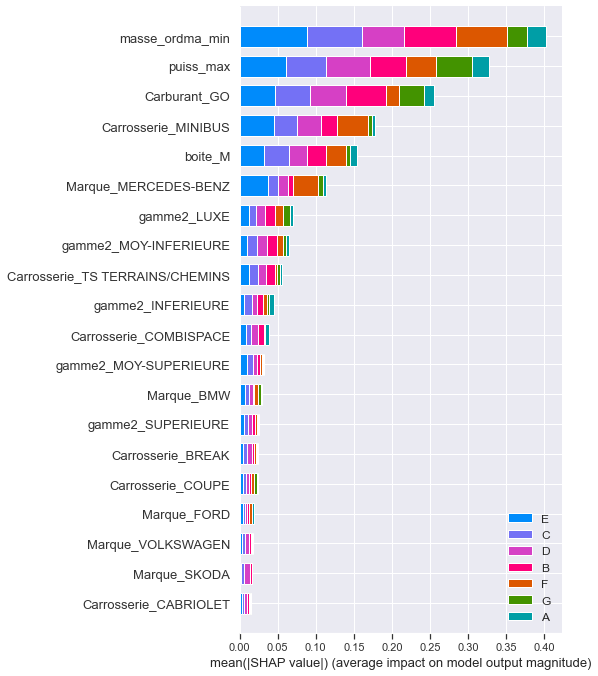

In [143]:
# Summary_plot:
shap.summary_plot(shap_values,
                  X_test,
                  plot_type="bar",
                  class_names = ['A', 'B', 'C', 'D', 'E', 'F','G'])

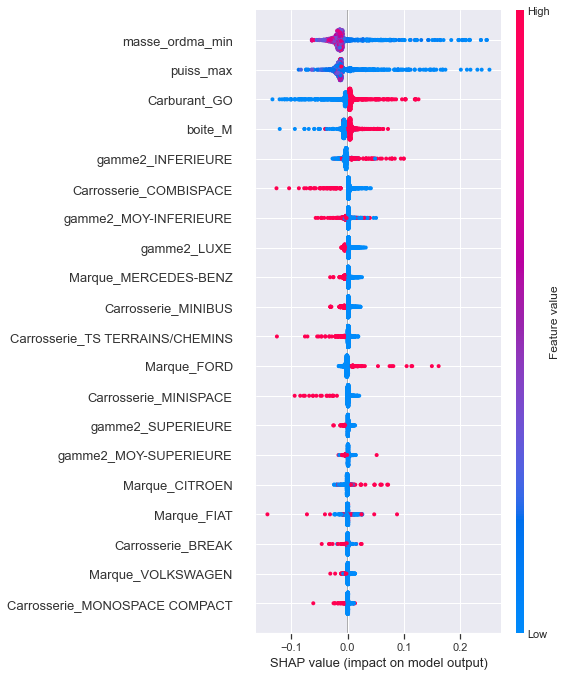

In [144]:
# Catégorie A:
shap.summary_plot(shap_values[0], X_test, feature_names=feats.columns)

La classe A regroupe les véhicules les moins polluants.

Les véhicules appartenant plus à cette classe ont une faible puissance, une faible masse et sont de type diesel.

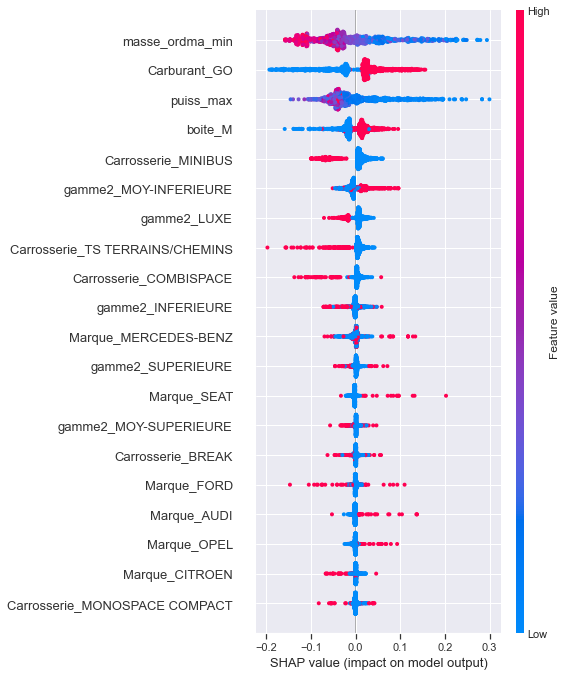

In [145]:
# Catégorie B:
shap.summary_plot(shap_values[1], X_test, feature_names=feats.columns)

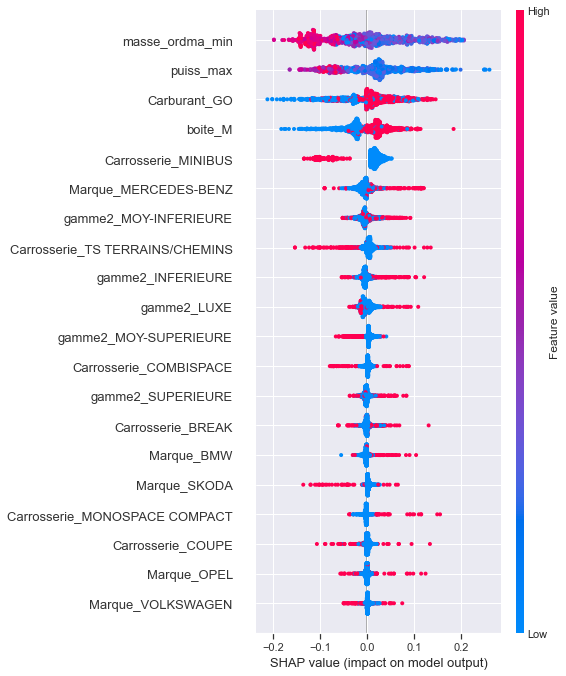

In [146]:
# Catégorie C:
shap.summary_plot(shap_values[2], X_test, feature_names=feats.columns)

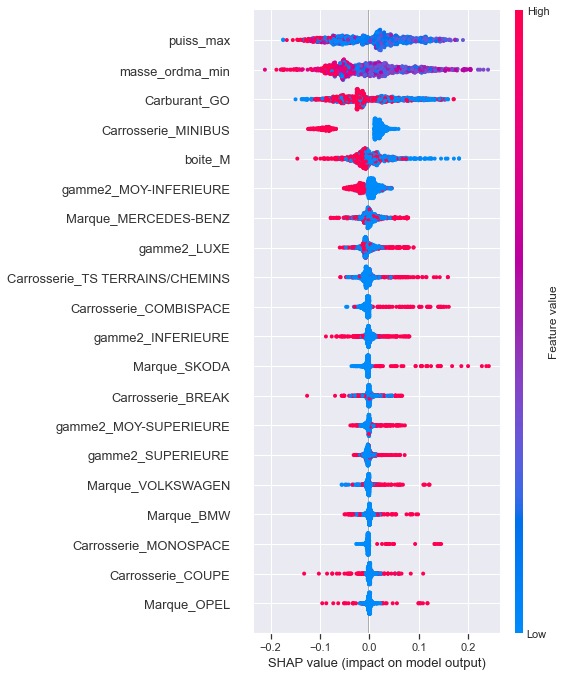

In [147]:
# Catégorie D:
shap.summary_plot(shap_values[3], X_test, feature_names=feats.columns)

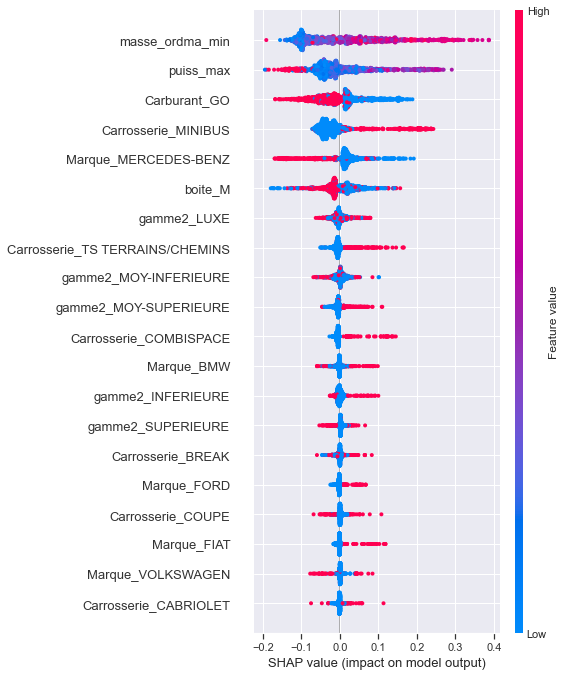

In [148]:
# Catégorie E:
shap.summary_plot(shap_values[4], X_test, feature_names=feats.columns)

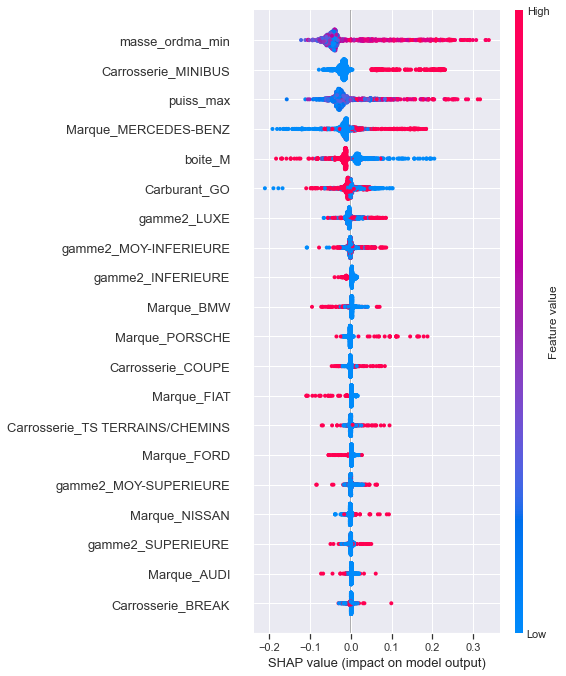

In [149]:
# Catégorie F:
shap.summary_plot(shap_values[5], X_test, feature_names=feats.columns)

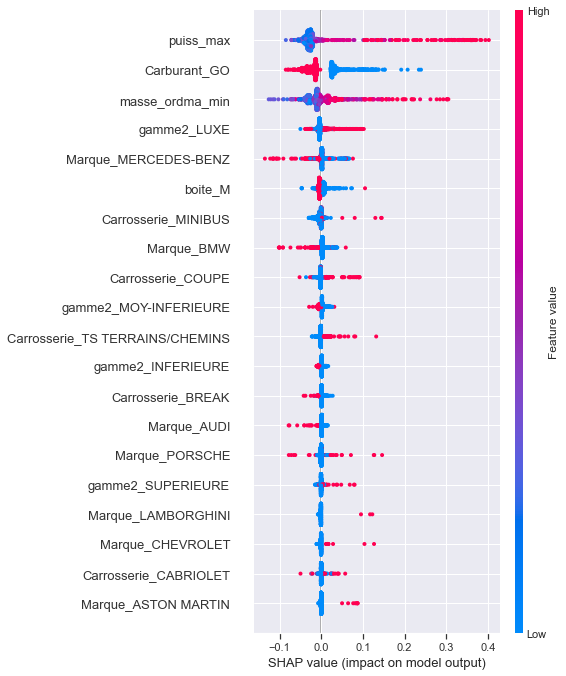

In [150]:
# Catégorie G:
shap.summary_plot(shap_values[6], X_test, feature_names=feats.columns)

Interprétation locale

In [209]:
# Création d'un DataFrame regroupant par index (véhicules) les catégories réelles de pollution, les catégories prédites
# le modèle et l'index de y_pred
comp_cat = pd.DataFrame(y_test)
comp_cat['Cat_CO2_pred'] = pd.DataFrame(y_pred_rf_grid, index = y_test.index)
comp_cat['index_shape'] = pd.DataFrame(y_pred_rf_grid).index
comp_cat.head(5)

Cat_CO2 Cat_CO2_pred  index_shape
44262       E            E            0
42318       B            A            1
43710       C            B            2
8959        F            E            3
1715        E            E            4

In [210]:
# Sélection des véhicules suivant leurs catégories de pollution réelle et prédite par le modèle:
# Sélectionner les catégories suivant la matrice de confusion du modèle.
Cat_rl = 'C'     # Catégorie réelle
Cat_pred = 'E'   # Catégorie prédite

comp_cat[(comp_cat['Cat_CO2'] == Cat_rl)&(comp_cat['Cat_CO2_pred'] == Cat_pred)]

Cat_CO2 Cat_CO2_pred  index_shape
44830       C            E          203
44821       C            E          513
698         C            E         1141

In [211]:
# Affichage de tous les force_plot (un force_plot par catégorie de pollution) pour un véhicule sélectionné
# Renseigner uniquement le paramètre suivant i (valeur de index_shape de comp_cat) selon les résultats de la
# sélection précédente

i=513

# Sélection de l'index correspondant:
index = comp_cat[comp_cat.index_shape == i].index

# Affichage des caractéristiques et des catégories réelle et prédite de pollution du véhicule sélectionné:
print('Affichage des caractéristiques et des catégories réelle et prédite de pollution du véhicule')
df1 = df.join(pd.DataFrame(y_pred_rf_grid, index = y_test.index))
df1 = df1.rename({0:'Cat_CO2_pred'}, axis = 1)
display(df1.loc[index])

# Affichage des force_plot du véhicule sélectionné par catégorie de pollution:
shap.initjs()
display("Catégorie A", shap.force_plot(explainer.expected_value[0], shap_values[0][i,:], X_test.iloc[i,:]))
display("Catégorie B", shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X_test.iloc[i,:]))
display("Catégorie C", shap.force_plot(explainer.expected_value[2], shap_values[2][i,:], X_test.iloc[i,:]))
display("Catégorie D", shap.force_plot(explainer.expected_value[3], shap_values[3][i,:], X_test.iloc[i,:]))
display("Catégorie E", shap.force_plot(explainer.expected_value[4], shap_values[4][i,:], X_test.iloc[i,:]))
display("Catégorie F", shap.force_plot(explainer.expected_value[5], shap_values[5][i,:], X_test.iloc[i,:]))
display("Catégorie G", shap.force_plot(explainer.expected_value[6], shap_values[6][i,:], X_test.iloc[i,:]))

Affichage des caractéristiques et des catégories réelle et prédite de pollution du véhicule


Marque Carburant  puiss_max    CO2  masse_ordma_min Carrosserie boite  \
44821  VOLVO        GO      100.0  134.0             1690       BREAK     A   

           gamme2 Cat_CO2 Cat_CO2_pred  
44821  SUPERIEURE       C            E

'Catégorie A'

'Catégorie B'

'Catégorie C'

'Catégorie D'

'Catégorie E'

'Catégorie F'

'Catégorie G'

Index Véhicule 2153 (index_shap 660)
les variables boite et carburant sont déterminantes pour dire que le véhicule appartient à la catégorie C (classe prédite) alors que ce sont ces 2 mêmes variables qui permettent de dire que le véhicule n'appartient pas à la catégorie E (classe réelle).

Catégorie A


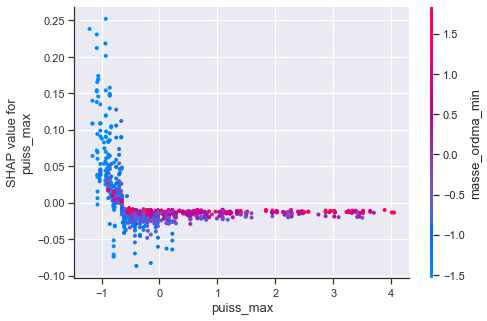

None

None

Catégorie B


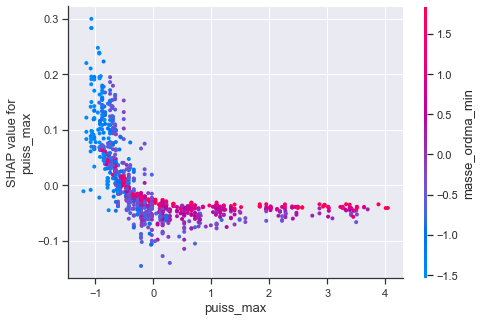

None

None

Catégorie C


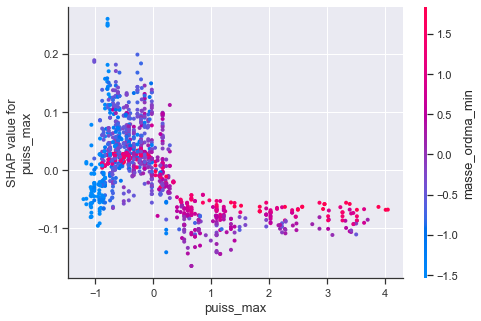

None

None

Catégorie D


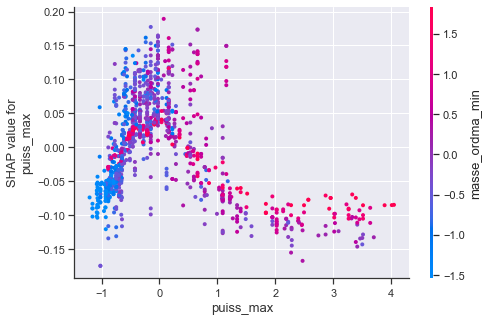

None

None

Catégorie E


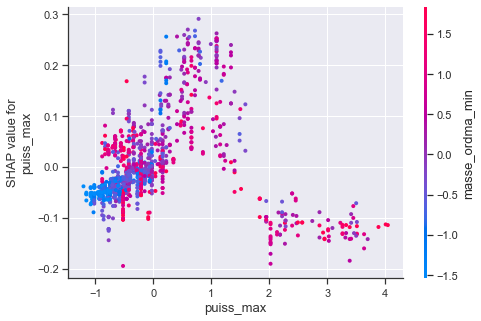

None

None

Catégorie F


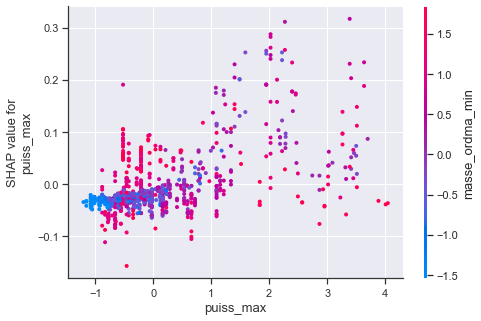

None

None

Catégorie G


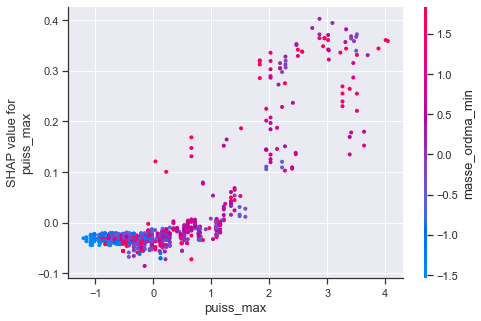

None

None

In [154]:
# Dependence_plot puissance/masse par catégorie:
display(print("Catégorie A"), shap.dependence_plot("puiss_max", shap_values[0], X_test, interaction_index= "masse_ordma_min"))
display(print("Catégorie B"), shap.dependence_plot("puiss_max", shap_values[1], X_test, interaction_index= "masse_ordma_min"))
display(print("Catégorie C"), shap.dependence_plot("puiss_max", shap_values[2], X_test, interaction_index= "masse_ordma_min"))
display(print("Catégorie D"), shap.dependence_plot("puiss_max", shap_values[3], X_test, interaction_index= "masse_ordma_min"))
display(print("Catégorie E"), shap.dependence_plot("puiss_max", shap_values[4], X_test, interaction_index= "masse_ordma_min"))
display(print("Catégorie F"), shap.dependence_plot("puiss_max", shap_values[5], X_test, interaction_index= "masse_ordma_min"))
display(print("Catégorie G"), shap.dependence_plot("puiss_max", shap_values[6], X_test, interaction_index= "masse_ordma_min"))

Cat A: Effet de la puissance des véhicules sur les prédictions faites de la classe A. Les véhicules de faible puissance ont effet positif sur les prédictions de la classe A. Les véhicules de faible puissance de de faible masse sont plus susceptibles d'appartenir à la classe A

Catégorie A


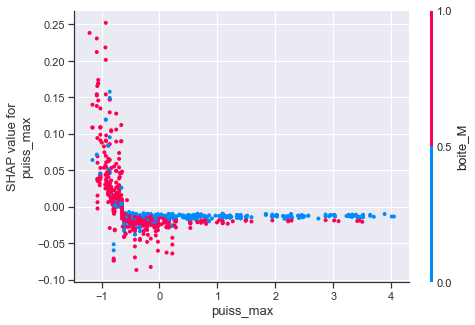

None

None

Catégorie B


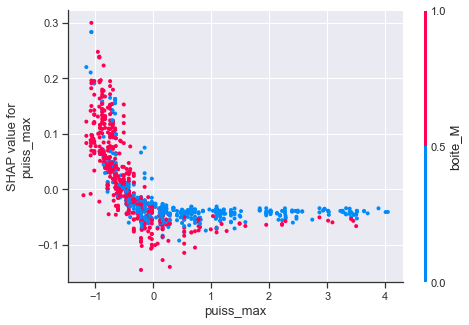

None

None

Catégorie C


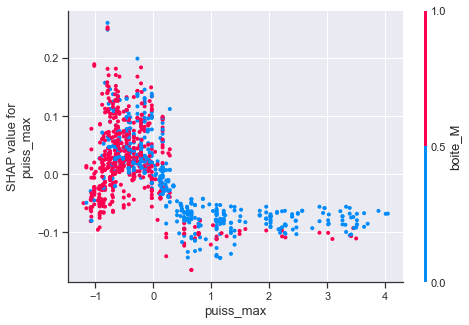

None

None

Catégorie D


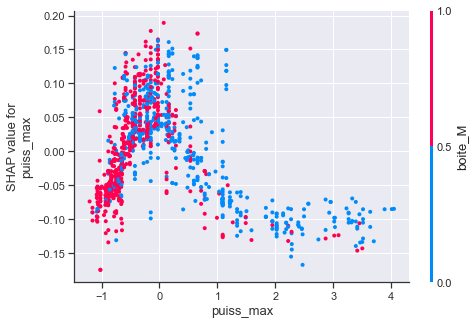

None

None

Catégorie E


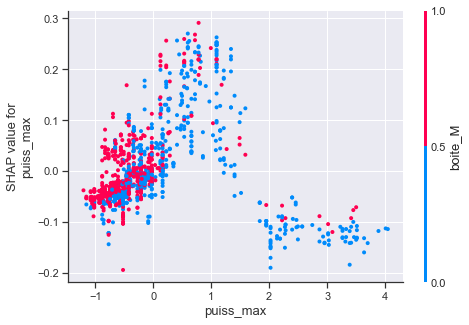

None

None

Catégorie F


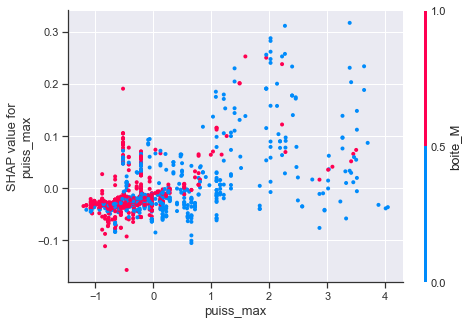

None

None

Catégorie G


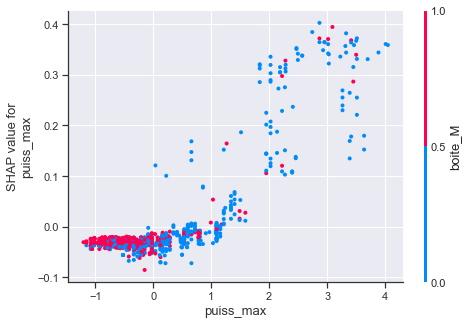

None

None

In [155]:
# Dependence_plot puissance/boit_M par catégorie:
display(print("Catégorie A"), shap.dependence_plot("puiss_max", shap_values[0], X_test, interaction_index= "boite_M"))
display(print("Catégorie B"), shap.dependence_plot("puiss_max", shap_values[1], X_test, interaction_index= "boite_M"))
display(print("Catégorie C"), shap.dependence_plot("puiss_max", shap_values[2], X_test, interaction_index= "boite_M"))
display(print("Catégorie D"), shap.dependence_plot("puiss_max", shap_values[3], X_test, interaction_index= "boite_M"))
display(print("Catégorie E"), shap.dependence_plot("puiss_max", shap_values[4], X_test, interaction_index= "boite_M"))
display(print("Catégorie F"), shap.dependence_plot("puiss_max", shap_values[5], X_test, interaction_index= "boite_M"))
display(print("Catégorie G"), shap.dependence_plot("puiss_max", shap_values[6], X_test, interaction_index= "boite_M"))

SVC

In [156]:
# SHAP
explainer_svc = shap.KernelExplainer(svc_opt.predict_proba, X_test)
shap_values_svc = explainer.shap_values(X_test)

print('Expected Value:', explainer_svc.expected_value)

Using 1255 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Expected Value: [0.03047259 0.12634057 0.19977947 0.20390014 0.24038871 0.13845143
 0.06066707]


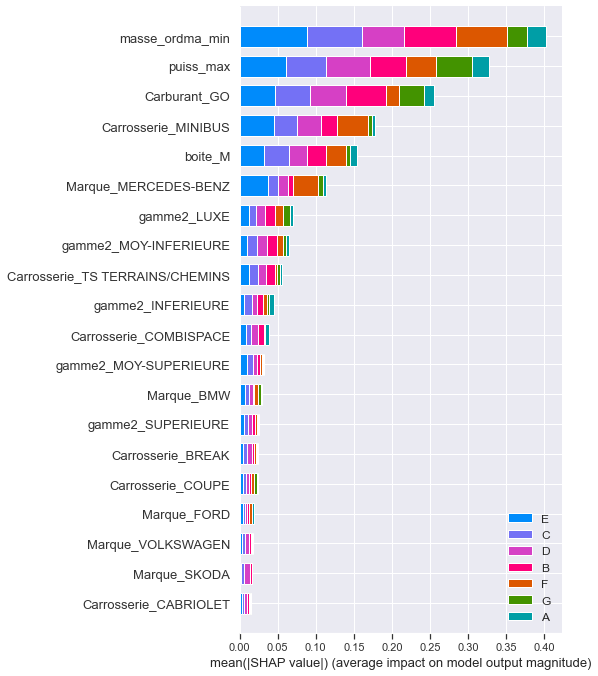

In [157]:
shap.summary_plot(shap_values_svc, 
                  X_test,
                  plot_type="bar",
                  class_names = ['A', 'B', 'C', 'D', 'E', 'F','G'])

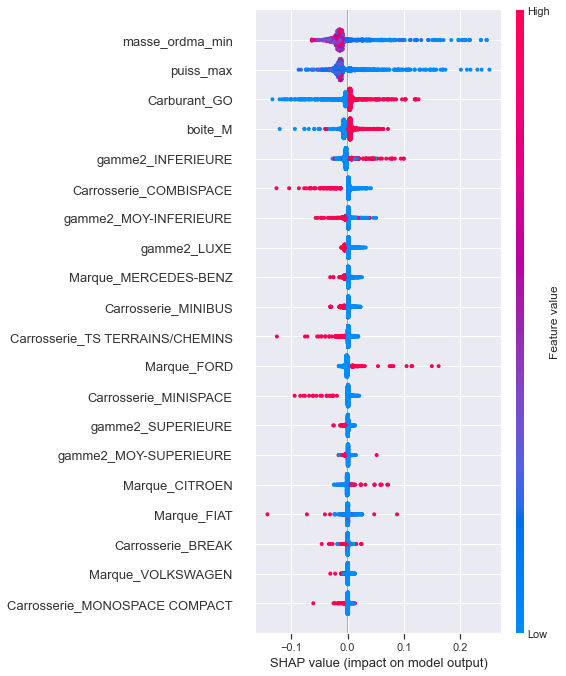

In [158]:
# Catégorie A:
shap.summary_plot(shap_values_svc[0], X_test, feature_names=feats.columns)

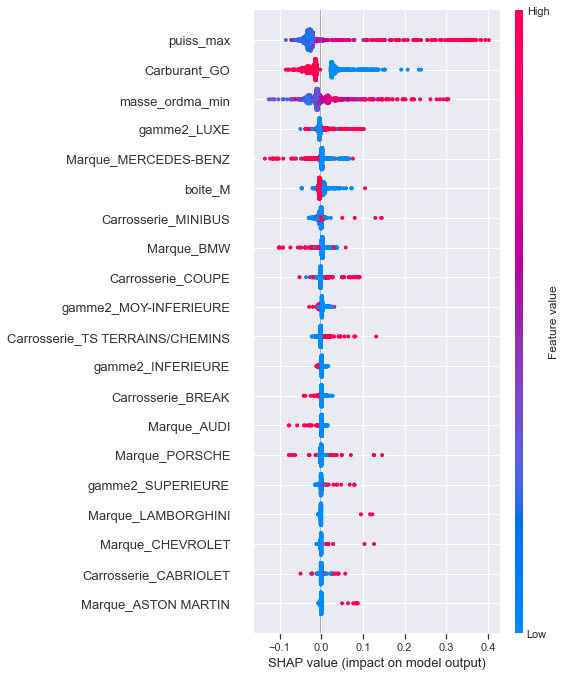

In [159]:
# Catégorie G:
shap.summary_plot(shap_values_svc[6], X_test, feature_names=feats.columns)

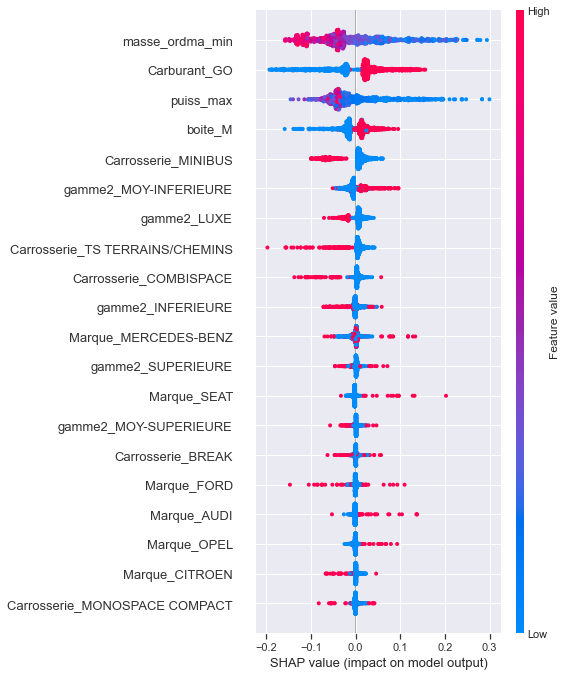

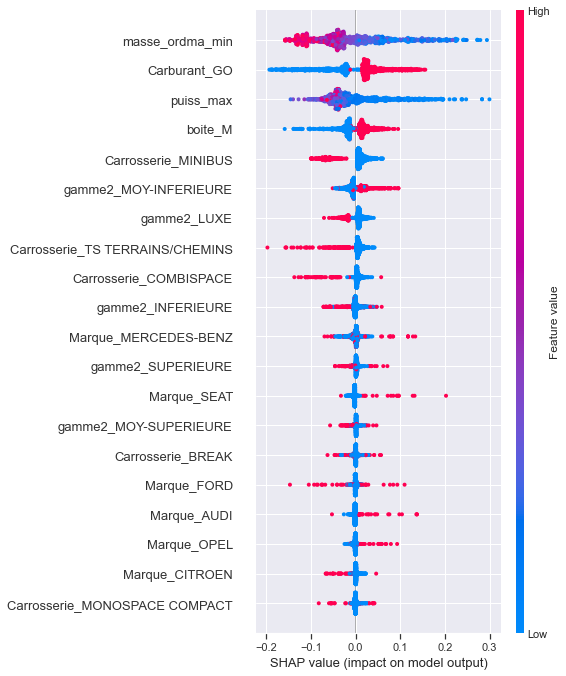

In [160]:
# Catégorie A:
shap.summary_plot(shap_values_svc[1], X_test, feature_names=feats.columns)
shap.summary_plot(shap_values[1], X_test, feature_names=feats.columns)